<a href="https://colab.research.google.com/github/mauricionoris/25B3_ml/blob/master/notebook2918925565.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
praveengovi_emotions_dataset_for_nlp_path = kagglehub.dataset_download('praveengovi/emotions-dataset-for-nlp')
pashupatigupta_emotion_detection_from_text_path = kagglehub.dataset_download('pashupatigupta/emotion-detection-from-text')

print('Data source import complete.')


Data source import complete.


<div style="background-color:#D6EAF8; padding:20px; border-radius:14px; box-shadow:0 4px 6px rgba(0,0,0,0.08);">

<h1><span style="background-color:#000000; color:white; padding:6px 16px; border-radius:12px;">Twitter Sentiment Analysis</span></h1>

<details open>
<summary>
  <span style="font-size:20px; color:#000000; font-weight:bold;">Can machines understand the mood behind every tweet?</span>
</summary>

<p style="color:#222; font-size:15.5px; margin-top:14px;">
In this notebook, we explore the vibrant world of Twitter sentiment, using everything from
<span style="background-color:#fffde7; font-weight:bold; padding:2px 6px; border-radius:6px;">classic ML</span>
to
<span style="background-color:#fffde7; font-weight:bold; padding:2px 6px; border-radius:6px;">deep learning</span>
and
<span style="background-color:#fffde7; font-weight:bold; padding:2px 6px; border-radius:6px;">transformers (BERT fine-tuning)</span>.
Let’s see if our models can catch the feels.
</p>

<hr>

<p>
  <span style="color:#1abc9c; font-size:18px; font-weight:bold;">
    <strong><span style="background-color:#000000; color:white; padding:2px 6px; border-radius:6px;">Roadmap:</span></strong>
  </span>
</p>

<ul style="color:#222; font-size:15.5px; line-height:1.7;">
  <li>
    <span style="background-color:#fffde7; font-weight:bold; padding:2px 6px; border-radius:6px;">Preprocessing & Data Exploration:</span>
    Remove duplicates, handle null/missing values, filter out non-English tweets, and visualize class distribution, stop words, and text length.
  </li>
  <li>
    <span style="background-color:#fffde7; font-weight:bold; padding:2px 6px; border-radius:6px;">TF-IDF Embeddings:</span>
    Representing tweets as feature vectors using TF-IDF.
  </li>
  <li>
    <span style="background-color:#fffde7; font-weight:bold; padding:2px 6px; border-radius:6px;">Classic ML Models (with Grid Search):</span>
    Testing Logistic Regression, Decision Tree, Random Forest, and SVM, all tuned with grid search for best performance.
  </li>
  <li>
    <span style="background-color:#fffde7; font-weight:bold; padding:2px 6px; border-radius:6px;">Dealing with Class Imbalance:</span>
    Using text augmentation and class weights for fairer learning.
  </li>
  <li>
    <span style="background-color:#fffde7; font-weight:bold; padding:2px 6px; border-radius:6px;">Tokenization:</span>
    Using
    <span style="background-color:#f7f7f9; padding:2px 6px; border-radius:6px; font-weight:bold;">Keras Tokenizer (word-level)</span> for classic neural nets,
    <span style="background-color:#f7f7f9; padding:2px 6px; border-radius:6px; font-weight:bold;">BPE Tokenizer (Byte Pair Encoding)</span> for custom neural nets, and
    <span style="background-color:#f7f7f9; padding:2px 6px; border-radius:6px; font-weight:bold;">BERT Tokenizer (WordPiece)</span> for transformer models.
  </li>
  <li>
    <span style="background-color:#fffde7; font-weight:bold; padding:2px 6px; border-radius:6px;">Custom Neural Networks:</span>
    Combining tokenized inputs, neural embeddings, and attention layers for our own NN classifier.
  </li>
  <li>
    <span style="background-color:#fffde7; font-weight:bold; padding:2px 6px; border-radius:6px;">GloVe + LSTM:</span>
    Mixing GloVe word embeddings with LSTM networks.
  </li>
  <li>
    <span style="background-color:#fffde7; font-weight:bold; padding:2px 6px; border-radius:6px;">Pretrained BERT:</span>
    Leveraging the pretrained BERT model and its tokenizer, then fine-tuning it for tweet sentiment.
  </li>
</ul>

<hr>

<table style="width:100%; border-collapse:separate; border-spacing:0; background:#fff; border-radius:14px; overflow:hidden; box-shadow: 1px 3px 12px rgba(0,0,0,0.08); margin-bottom:24px;">
  <tr style="background-color:#000000;">
    <th style="color:white; padding:14px; font-size:18px; text-align:left; font-weight:bold;">📝 Step</th>
    <th style="color:white; padding:14px; font-size:18px; text-align:left; font-weight:bold;">💡 Approach / Method</th>
  </tr>
  <tr>
    <td style="padding:14px 12px; border-bottom:1px solid #eee; font-weight:bold; font-size:16px;">
      <span style="background-color:#fffde7; padding:2px 6px; border-radius:6px;">Preprocessing</span>
    </td>
    <td style="padding:14px 12px; border-bottom:1px solid #eee; font-weight:bold; font-size:16px;">
      Remove duplicates, handle nulls, filter non-English, visualize class/stopwords/text length
    </td>
  </tr>
  <tr>
    <td style="padding:14px 12px; border-bottom:1px solid #eee; font-weight:bold; font-size:16px;">
      <span style="background-color:#fffde7; padding:2px 6px; border-radius:6px;">Embedding</span>
    </td>
    <td style="padding:14px 12px; border-bottom:1px solid #eee; font-weight:bold; font-size:16px;">TF-IDF, GloVe, BERT</td>
  </tr>
  <tr>
    <td style="padding:14px 12px; border-bottom:1px solid #eee; font-weight:bold; font-size:16px;">
      <span style="background-color:#fffde7; padding:2px 6px; border-radius:6px;">Tokenization</span>
    </td>
    <td style="padding:14px 12px; border-bottom:1px solid #eee; font-weight:bold; font-size:16px;">
      <span style="background-color:#f7f7f9; padding:2px 6px; border-radius:6px; font-weight:bold;">Keras Tokenizer (word-level)</span>,
      <span style="background-color:#f7f7f9; padding:2px 6px; border-radius:6px; font-weight:bold;">BPE Tokenizer (Byte Pair Encoding)</span>,
      <span style="background-color:#f7f7f9; padding:2px 6px; border-radius:6px; font-weight:bold;">BERT Tokenizer (WordPiece)</span>
    </td>
  </tr>
  <tr>
    <td style="padding:14px 12px; border-bottom:1px solid #eee; font-weight:bold; font-size:16px;">
      <span style="background-color:#fffde7; padding:2px 6px; border-radius:6px;">Classic ML</span>
    </td>
    <td style="padding:14px 12px; border-bottom:1px solid #eee; font-weight:bold; font-size:16px;">LogReg, Decision Tree, RandomForest, SVM</td>
  </tr>
  <tr>
    <td style="padding:14px 12px; border-bottom:1px solid #eee; font-weight:bold; font-size:16px;">
      <span style="background-color:#fffde7; padding:2px 6px; border-radius:6px;">Class Balance</span>
    </td>
    <td style="padding:14px 12px; border-bottom:1px solid #eee; font-weight:bold; font-size:16px;">Text Augmentation, Class Weights</td>
  </tr>
  <tr>
    <td style="padding:14px 12px; font-weight:bold; font-size:16px;">
      <span style="background-color:#fffde7; padding:2px 6px; border-radius:6px;">Deep Learning</span>
    </td>
    <td style="padding:14px 12px; font-weight:bold; font-size:16px;">Custom NN + Attention, LSTM, BERT</td>
  </tr>
</table>

</div>


In [2]:
!wget https://dl.fbaipublicfiles.com/fasttext/supervised-models/lid.176.bin
!pip install langdetect
!pip install langid
!pip install fasttext
!pip install nlpaug
!pip install transformers datasets
!pip install keras-tuner
!pip install gensim


--2025-08-11 14:54:30--  https://dl.fbaipublicfiles.com/fasttext/supervised-models/lid.176.bin
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 18.173.166.31, 18.173.166.74, 18.173.166.48, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|18.173.166.31|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 131266198 (125M) [application/octet-stream]
Saving to: ‘lid.176.bin.1’

lid.176.bin.1       100%[===================>] 125.18M   194MB/s    in 0.6s    

2025-08-11 14:54:31 (194 MB/s) - ‘lid.176.bin.1’ saved [131266198/131266198]



In [3]:
import pandas as pd
import numpy as np
import re

import gensim.downloader as api

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Progress Bar
from tqdm import tqdm

# NLP & Augmentation
import nlpaug.augmenter.word as naw
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Language Detection
from langdetect import detect, DetectorFactory
import langid
import fasttext




# Tokenization
from tokenizers import Tokenizer, models, trainers, pre_tokenizers
from tokenizers.models import BPE
from tokenizers.trainers import BpeTrainer
from tensorflow.keras.preprocessing.text import Tokenizer as KerasTokenizer

from tokenizers.pre_tokenizers import Whitespace

# Text Preprocessing
from keras.preprocessing.sequence import pad_sequences

# Classical ML
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score

# Neural Networks
from tensorflow.keras import layers, Model
import keras_tuner as kt
from tensorflow.keras.layers import Input, Embedding, MultiHeadAttention, GlobalAveragePooling1D, Dropout, Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam


# Hugging Face Transformers
from datasets import Dataset
from transformers import (
    BertTokenizer,
    BertForSequenceClassification,
    TrainingArguments,
    Trainer
)


# save and load models
import joblib
from transformers import AutoTokenizer

# Initialize NLTK stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
stop_words = set(stopwords.words('english'))

# tqdm progress bar for pandas
tqdm.pandas()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


# Loading and Exploring the Dataset

<div style="background-color:#D6EAF8; padding:20px; border-radius:14px; box-shadow:0 4px 6px rgba(0,0,0,0.08);">

<p>
  <span style="background-color:#fffde7; font-weight:bold; padding:2px 8px; border-radius:8px;">Dataset Structure</span>
</p>

<ul style="font-size:15.5px; color:#222; line-height:1.7;">
  <li>
    The dataset is split into three files:
    <span style="background-color:#fffde7; font-weight:bold; padding:2px 8px; border-radius:8px;">train.txt</span> (training),
    <span style="background-color:#fffde7; font-weight:bold; padding:2px 8px; border-radius:8px;">val.txt</span> (validation),
    <span style="background-color:#fffde7; font-weight:bold; padding:2px 8px; border-radius:8px;">test.txt</span> (testing).
  </li>
  <li>
    Each file contains text samples with their emotion labels, separated by a <span style="background-color:#fffde7; font-weight:bold; padding:2px 8px; border-radius:8px;">colon</span>.
  </li>
</ul>

<p>
  <span style="background-color:#fffde7; font-weight:bold; padding:2px 8px; border-radius:8px;">After Loading the Data</span>
</p>

<ul style="font-size:15.5px; color:#222; line-height:1.7;">
  <li><strong>Preview</strong> a few entries to check the format.</li>
  <li><strong>Check</strong> the number of samples in each split to ensure everything loaded correctly.</li>
</ul>

</div>


In [4]:
train_df = pd.read_csv('/kaggle/input/emotions-dataset-for-nlp/train.txt', sep=';', header=None, names=['text', 'label'])
val_df = pd.read_csv('/kaggle/input/emotions-dataset-for-nlp/val.txt', sep=';', header=None, names=['text', 'label'])
test_df = pd.read_csv('/kaggle/input/emotions-dataset-for-nlp/test.txt', sep=';', header=None, names=['text', 'label'])

In [5]:
train_df.head()

,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [6]:
val_df.head()

,text,label
0,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,sadness
2,i feel like a faithful servant,love
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy


In [7]:
test_df.head()

,text,label
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


In [8]:
print(f"Train set shape:      {train_df.shape}")
print(f"Validation set shape: {val_df.shape}")
print(f"Test set shape:       {test_df.shape}")

Train set shape:      (16000, 2)
Validation set shape: (2000, 2)
Test set shape:       (2000, 2)


# Handling Duplicate Text Entries

<div style="background-color:#D6EAF8; padding:20px; border-radius:14px; box-shadow:0 4px 6px rgba(0,0,0,0.08);">

<p>
Cleaning the training, validation, and test datasets by identifying and removing duplicate text entries.
</p>

<p>
  <span style="background-color:#fffde7; font-weight:bold; padding:2px 8px; border-radius:8px;">
    1. Removing Exact Duplicates
  </span>
</p>
<p>
We first check for rows that are completely identical, both in text and label. These entries add no value and can bias the model, so we remove them.
</p>

<p>
  <span style="background-color:#fffde7; font-weight:bold; padding:2px 8px; border-radius:8px;">
    2. Detecting Text Duplicates with Conflicting Labels
  </span>
</p>
<p>
Next, we look for cases where the <strong>same text</strong> appears more than once but has been assigned <strong>different labels</strong>. These inconsistencies can confuse the model during training, so we remove them as well.
</p>

</div>


## 1️⃣ Exact Duplicates

In [9]:
print("Number of duplicate rows in each split:")
print(f"Train:      {train_df.duplicated().sum()}")
print(f"Validation: {val_df.duplicated().sum()}")
print(f"Test:       {test_df.duplicated().sum()}")

Number of duplicate rows in each split:
Train:      1
Validation: 0
Test:       0


In [10]:
train_df[train_df.duplicated()]

,text,label
13846,i feel more adventurous willing to take risks ...,joy


<div style="background-color:#FDEDEC; padding:16px; border-radius:10px; box-shadow:0 2px 4px rgba(0,0,0,0.07);">

<h3>
  <span style="background-color:#C0392B; color:white; padding:6px 16px; border-radius:10px;">
    Duplicate Row Detected
  </span>
</h3>

<p>
Only <span style="background-color:#fffde7; font-weight:bold; padding:2px 8px; border-radius:8px;"><strong>one duplicated value</strong></span> was found in the <span style="background-color:#fffde7; font-weight:bold; padding:2px 8px; border-radius:8px;"><strong>train split</strong></span>.<br>
Since it's just a single row, we'll go ahead and drop it.
</p>

</div>


## 2️⃣ Text Duplicates with Conflicting Labels


In [11]:
duplicates_tweet_id = train_df[train_df['text'].duplicated(keep=False)]
duplicates_tweet_id_sorted = duplicates_tweet_id.sort_values(by='text')
duplicates_tweet_id_sorted

,text,label
8246,i am not amazing or great at photography but i...,love
3508,i am not amazing or great at photography but i...,joy
15705,i began to feel accepted by gaia on her own terms,joy
5277,i began to feel accepted by gaia on her own terms,love
8804,i bet taylor swift basks in the knowledge that...,fear
...,...,...
11354,i write these words i feel sweet baby kicks fr...,love
7685,im still not sure why reilly feels the need to...,surprise
2908,im still not sure why reilly feels the need to...,fear
9596,ive also made it with both sugar measurements ...,joy


In [12]:
duplicates_tweet_id = val_df[val_df['text'].duplicated(keep=False)]
duplicates_tweet_id_sorted = duplicates_tweet_id.sort_values(by='text')
duplicates_tweet_id_sorted

,text,label
774,i feel so tortured by it,fear
1993,i feel so tortured by it,anger
300,i have had several new members tell me how com...,love
603,i have had several new members tell me how com...,joy


In [13]:
duplicates_content = test_df[test_df['text'].duplicated(keep=False)]
duplicates_content_sorted = duplicates_content.sort_values(by='text')
duplicates_content_sorted

,text,label


In [14]:
val_df = val_df[~val_df['text'].duplicated(keep=False)]
train_df = train_df[~train_df['text'].duplicated(keep=False)]
test_df = test_df[~test_df['text'].duplicated(keep=False)]

<div style="background-color:#FDEDEC; padding:16px; border-radius:10px; box-shadow:0 2px 4px rgba(0,0,0,0.07);">

<h3>
  <span style="background-color:#C0392B; color:white; padding:6px 16px; border-radius:10px;">
    Text Duplicates with Conflicting Labels Detected
  </span>
</h3>

<p>
We found several records of
<span style="background-color:#fffde7; font-weight:bold; padding:2px 8px; border-radius:8px;"><strong>duplicated tweets</strong></span>,
where the exact same text was assigned to different sentiment labels.<br>
To avoid confusion and maintain label consistency, all rows with duplicated text and conflicting labels were dropped from each dataset.
</p>

</div>


# Missing Value Check

<div style="background-color:#D6EAF8; padding:16px; border-radius:10px; box-shadow:0 2px 4px rgba(0,0,0,0.07);">


<p>
Before proceeding, it’s good practice to verify that our dataset doesn’t contain any missing values in the crucial columns
(<span style="background-color:#fffde7; font-weight:bold; padding:2px 8px; border-radius:8px;"><strong>text</strong></span> and
<span style="background-color:#fffde7; font-weight:bold; padding:2px 8px; border-radius:8px;"><strong>label</strong></span>).<br>
Missing values can lead to unexpected errors during preprocessing or modeling.
</p>

</div>


In [15]:
train_df.isna().sum()

,0
text,0
label,0


In [16]:
val_df.isna().sum()

,0
text,0
label,0


In [17]:
test_df.isna().sum()

,0
text,0
label,0


<div style="background-color:#D5F5E3; padding:16px; border-radius:10px; box-shadow:0 2px 4px rgba(0,0,0,0.07);">

<p>
  <span style="background-color:#229954; color:white; padding:6px 16px; border-radius:10px;">
    All Clear: No Missing Values
  </span>
</p>

<p>
All splits
<span style="background-color:#fffde7; font-weight:bold; padding:2px 8px; border-radius:8px;"><strong>train</strong></span>,
<span style="background-color:#fffde7; font-weight:bold; padding:2px 8px; border-radius:8px;"><strong>validation</strong></span>,
and
<span style="background-color:#fffde7; font-weight:bold; padding:2px 8px; border-radius:8px;"><strong>test</strong></span>
are complete, with no missing values in either the
<span style="background-color:#fffde7; font-weight:bold; padding:2px 8px; border-radius:8px;"><strong>text</strong></span>
or
<span style="background-color:#fffde7; font-weight:bold; padding:2px 8px; border-radius:8px;"><strong>label</strong></span>
columns.
</p>

</div>


<h3> <span style="background-color:#117A65; color:white; padding:6px 16px; border-radius:10px;">Dataset Size After Cleaning</span></h3>

In [18]:
print(f"Train set shape:      {train_df.shape}")
print(f"Validation set shape: {val_df.shape}")
print(f"Test set shape:       {test_df.shape}")

Train set shape:      (15938, 2)
Validation set shape: (1996, 2)
Test set shape:       (2000, 2)


# Exploratory Data Analysis Overview

<div style="background-color:#D6EAF8; padding:20px; border-radius:14px; box-shadow:0 4px 6px rgba(0,0,0,0.1);">


<p>
Before jumping into modeling, it's always smart to get a feel for the dataset. Here are three simple but important visualizations to help us understand what we’re working with:
</p>

<hr>

<p>
  <span style="background-color:#fffde7; font-weight:bold; padding:2px 10px; border-radius:8px;">
    1️⃣ Sentiment Distribution by Dataset Split
  </span>
</p>

<p>
This grouped bar chart shows how many samples we have for each emotion (like
<span style="background-color:#fffde7; font-weight:bold; padding:2px 8px; border-radius:8px;"><strong>joy</strong></span>,
<span style="background-color:#fffde7; font-weight:bold; padding:2px 8px; border-radius:8px;"><strong>sadness</strong></span>,
<span style="background-color:#fffde7; font-weight:bold; padding:2px 8px; border-radius:8px;"><strong>anger</strong></span>, etc.)
in the training, validation, and test sets.<br>
Understanding the distribution of sentiment labels in our dataset is essential for spotting any potential class imbalance.
</p>

<hr>

<p>
  <span style="background-color:#fffde7; font-weight:bold; padding:2px 10px; border-radius:8px;">
    2️⃣ Text Length Distribution by Sentiment and Split
  </span>
</p>

<p>
Next up, the box plot breaks down how tweet lengths vary by emotion and by split.<br>
Are some feelings expressed with longer messages? Do the splits have similar distributions? This helps us catch any quirks in the data that might affect text processing or model training.
</p>

<hr>

<p>
  <span style="background-color:#fffde7; font-weight:bold; padding:2px 10px; border-radius:8px;">
    3️⃣ Most Frequent Stop Words
  </span>
</p>

<p>
Finally, this bar chart highlights the stop words that appear most often, think of words like
<span style="background-color:#fffde7; font-weight:bold; padding:2px 8px; border-radius:8px;"><strong>I</strong></span>,
<span style="background-color:#fffde7; font-weight:bold; padding:2px 8px; border-radius:8px;"><strong>to</strong></span>, or
<span style="background-color:#fffde7; font-weight:bold; padding:2px 8px; border-radius:8px;"><strong>and</strong></span>.<br>
Knowing which common words dominate can be useful for cleaning up the data and building better features later on.
</p>

</div>


## 1️⃣ Sentiment Distribution by Dataset Split

In [19]:
train_df_copy = train_df.copy()
val_df_copy = val_df.copy()
test_df_copy = test_df.copy()

train_df_copy['split'] = 'train'
val_df_copy['split'] = 'val'
test_df_copy['split'] = 'test'

for df in [train_df_copy, val_df_copy, test_df_copy]:
    df['text_length'] = df['text'].str.len()

full_df = pd.concat([train_df_copy, val_df_copy, test_df_copy], ignore_index=True)

fig = px.box(
    full_df,
    x='label',
    y='text_length',
    color='split',
    points='all',
    title='<b>Text Length Distribution by Label and Dataset Split</b>',
    labels={'label': 'Label', 'text_length': 'Text Length', 'split': 'Set'},
    template='plotly_dark',
    color_discrete_sequence=['mediumseagreen', 'gold', 'red']  # Train, Val, Test
)


for i, trace in enumerate(fig.data):
    if 'train' in trace.name:
        trace.marker.color = 'mediumseagreen'
        trace.line.color = 'mediumseagreen'
    elif 'val' in trace.name:
        trace.marker.color = 'gold'
        trace.line.color = 'gold'
    elif 'test' in trace.name:
        trace.marker.color = 'red'
        trace.line.color = 'red'

fig.update_layout(
    title_x=0.5,
    font=dict(size=14, color='white'),
    plot_bgcolor='black',
    paper_bgcolor='black',
    xaxis=dict(tickangle=-45, title_font=dict(color='white'), tickfont=dict(color='white')),
    yaxis=dict(title_font=dict(color='white'), tickfont=dict(color='white')),
    boxmode='group',
    boxgap=0.3,
    bargap=0.3,
)

fig.show()

## MNF - Como interpretar um boxplot

[Link](https://biomedstat.com.br/box-plot-interpretacao/)


## 2️⃣ Text Length Distribution by Sentiment and Split

In [20]:
sentiment_order = ['joy', 'sadness', 'anger', 'fear', 'love', 'surprise']

train_counts = train_df_copy['label'].value_counts().reset_index()
train_counts.columns = ['label', 'count']
train_counts['split'] = 'train'

val_counts = val_df_copy['label'].value_counts().reset_index()
val_counts.columns = ['label', 'count']
val_counts['split'] = 'val'

test_counts = test_df_copy['label'].value_counts().reset_index()
test_counts.columns = ['label', 'count']
test_counts['split'] = 'test'

all_counts = pd.concat([train_counts, val_counts, test_counts], ignore_index=True)
all_counts['label'] = pd.Categorical(all_counts['label'], categories=sentiment_order, ordered=True)

fig = px.bar(
    all_counts,
    x='label',
    y='count',
    color='split',
    barmode='group',
    text='count',
    category_orders={'label': sentiment_order, 'split': ['train', 'val', 'test']},
    labels={'label': 'Sentiment', 'count': 'Count', 'split': 'Set'},
    title='<b>Sentiment Distribution by Dataset Split</b>',
    template='plotly_dark',
    color_discrete_sequence=['mediumseagreen', 'gold', 'red']
)

fig.update_traces(
    textposition='outside',
    marker_line_width=1.5,
    marker_line_color='white',
)

fig.update_layout(
    margin=dict(t=80),
    title_x=0.5,
    font=dict(size=16, color='white'),
    plot_bgcolor='black',
    paper_bgcolor='black',
    xaxis=dict(
        tickangle=-45,
        title_font=dict(color='white'),
        tickfont=dict(color='white')
    ),
    yaxis=dict(
        title_font=dict(color='white'),
        tickfont=dict(color='white'),
        gridcolor='rgba(255,255,255,0.1)'
    ),
    bargap=0.15,
    bargroupgap=0.18,
    legend=dict(
        title='Split',
        font=dict(color='white'),
        bgcolor='rgba(0,0,0,0.7)',
        bordercolor='white',
        borderwidth=1
    )
)

fig.show()

<div style="background-color:#D6EAF8; padding:20px; border-radius:14px; box-shadow:0 4px 6px rgba(0,0,0,0.1);">

<h1>
  <span style="background-color:#e74c3c; color:white; padding:4px 12px; border-radius:8px;">
    Sentiment Distribution Conclusion
  </span>
</h1>

<p>
The sentiment distributions in the train, validation, and test sets are very similar, with
<span style="background-color:#fffde7; font-weight:bold; padding:2px 6px; border-radius:6px;"><strong>"joy"</strong></span>
and
<span style="background-color:#fffde7; font-weight:bold; padding:2px 6px; border-radius:6px;"><strong>"sadness"</strong></span>
being the most common and
<span style="background-color:#fffde7; font-weight:bold; padding:2px 6px; border-radius:6px;"><strong>"surprise"</strong></span>
the least common in each split.
</p>

<p>
This indicates that the data was
<span style="background-color:#fffde7; font-weight:bold; padding:2px 6px; border-radius:6px;"><strong>stratified</strong></span>
during splitting, preserving class proportions across all sets.<br>
However, there is a clear
<span style="background-color:#fffde7; font-weight:bold; padding:2px 6px; border-radius:6px;"><strong>class imbalance</strong></span>
that should be considered in further analysis and modeling.
</p>

</div>


## 3️⃣ Most Frequent Stop Words

In [21]:
stop_words = set(stopwords.words('english'))

words = (full_df['text'].str.lower().str.split().explode())

# Filter to stop words only
stopword_series = words[words.isin(stop_words)]

stopword_counts = stopword_series.value_counts().head(50).reset_index()
stopword_counts.columns = ['Stopword', 'Count']

fig = px.bar(
    stopword_counts,
    x='Stopword',
    y='Count',
    title='<b>Top Stop Words in Dataset</b>',
    template='plotly_dark',
    text='Count',
    color='Count',
    color_continuous_scale='viridis'
)

fig.update_traces(
    textposition='outside'
)
fig.update_layout(
    title_x=0.5,
    font=dict(size=14, color='white'),
    plot_bgcolor='black',
    paper_bgcolor='black',
    xaxis=dict(
        tickangle=50,
        title_font=dict(color='white'),
        tickfont=dict(color='white')
    ),
    yaxis=dict(
        title_font=dict(color='white'),
        tickfont=dict(color='white'),
        gridcolor='rgba(255,255,255,0.1)'
    ),
    margin=dict(t=90)
)

fig.show()

# Text Preprocessing Function

<div style="background-color:#D6EAF8; padding:20px; border-radius:14px; box-shadow:0 4px 6px rgba(0,0,0,0.1);">

<p>
Before analyzing or modeling tweet data, it’s crucial to
<strong>clean and standardize the text</strong>.
Tweets are noisy, they include mentions, hashtags, URLs, emojis, and other elements that can confuse NLP models.
</p>

<hr>

<h2>
  <span style="font-size:17px; font-weight:bold;">Why modular cleaning?</span>
</h2>

<p style="color:#222; font-size:15.5px; margin-bottom:0.8em;">
Different NLP models and vectorization methods require
<span style="background-color:#fffde7; font-weight:bold; padding:2px 6px; border-radius:6px;">different types of preprocessing</span>.
Instead of rewriting similar functions, we built a single
<span style="background-color:#fdf6e3; padding:2px 6px; border-radius:6px;"><strong>customizable <code>clean_text</code></strong></span>
function, allowing us to toggle steps on or off depending on the model’s needs.
</p>

<ul style="font-size:15.5px; color:#222; line-height:1.7;">
  <li>
    <span style="background-color:#fffde7; font-weight:bold; padding:2px 6px; border-radius:6px;">TF-IDF:</span>
    <strong>Heavy cleaning</strong>:
    <span style="background-color:#f7f7f9; padding:2px 6px; border-radius:6px; font-weight:bold;">remove stopwords</span>,
    <span style="background-color:#f7f7f9; padding:2px 6px; border-radius:6px; font-weight:bold;">lemmatize</span>,
    and remove as much noise as possible for pure word stats.
  </li>
  <li>
    <span style="background-color:#fffde7; font-weight:bold; padding:2px 6px; border-radius:6px;">BPE & Custom Neural Networks:</span>
    <strong>Light cleaning</strong> (no stopword removal or lemmatization), as subword models and neural nets benefit from more natural, less filtered text.
  </li>
  <li>
    <span style="background-color:#fffde7; font-weight:bold; padding:2px 6px; border-radius:6px;">GloVe:</span>
    <strong>Word-level tokenization</strong> (not subwords), keep stopwords, and minimal lemmatization, so we maximize GloVe vocabulary matches.
  </li>
  <li>
    <span style="background-color:#fffde7; font-weight:bold; padding:2px 6px; border-radius:6px;">BERT:</span>
    <strong>Minimal cleaning</strong>, since transformers expect “messy” real-world text (including hashtags, contractions, etc.) for their tokenizers and deep context.
  </li>
</ul>

<hr>

<p>
  <span style="background-color:#fdedfa; padding:2px 8px; border-radius:8px; font-weight:bold;">
    Main cleaning tools:
  </span>
</p>

<ul style="font-size:15.5px; color:#222; line-height:1.7; margin-bottom:0.5em;">
    <li>
        <span style="background-color:#f9e79f; padding:2px 8px; border-radius:8px; font-weight:bold;">is_only_mentions(text):</span>
        Checks if a tweet is just mentions (like
        <span style="background-color:#fffde7; padding:2px 6px; border-radius:6px; font-weight:bold;">@user1 @user2</span>).
        These usually don't have real sentiment and can be dropped for most NLP tasks.
    </li>
    <li>
        <span style="background-color:#fdedfa; padding:2px 8px; border-radius:8px; font-weight:bold;">clean_text(...):</span>
        A modular function to apply only the cleaning steps needed for each experiment, such as:
        <ul style="margin-top:0.5em; margin-bottom:0.5em;">
            <li><span style="background-color:#f7f7f9; padding:2px 6px; border-radius:6px; font-weight:bold;">Lowercasing</span> for consistency</li>
            <li><span style="background-color:#f7f7f9; padding:2px 6px; border-radius:6px; font-weight:bold;">Remove stopwords</span></li>
            <li><span style="background-color:#f7f7f9; padding:2px 6px; border-radius:6px; font-weight:bold;">Lemmatize</span> words</li>
            <li><span style="background-color:#f7f7f9; padding:2px 6px; border-radius:6px; font-weight:bold;">Remove mentions, hashtags, URLs, numbers, only-mentions tweets</span></li>
            <li><span style="background-color:#f7f7f9; padding:2px 6px; border-radius:6px; font-weight:bold;">Remove weird symbols</span> (keep basic punctuation)</li>
            <li><span style="background-color:#f7f7f9; padding:2px 6px; border-radius:6px; font-weight:bold;">Remove extra spaces</span></li>
        </ul>
    </li>
</ul>

</div>


In [23]:
def is_only_mentions(text):
    # Matches only @mentions with optional whitespace or punctuation
    return bool(re.fullmatch(r'(@\w+\s*)+', str(text).strip()))

def clean_text(
    text,
    remove_numbers=True,
    remove_stopwords=False,
    remove_mentions=True,
    remove_hashtags=True,
    remove_urls=True,
    remove_only_mentions=True,
    lemmatize=False,
    remove_punctuation=True
):
    if not isinstance(text, str):
        return ""

    # Remove if only mentions
    if remove_only_mentions and is_only_mentions(text):
        return ""

    text = text.lower()

    # Remove mentions
    if remove_mentions:
        text = re.sub(r'@\w+', '', text)

    # Remove hashtags
    if remove_hashtags:
        text = re.sub(r'#\w+', '', text)

    # Remove URLs
    if remove_urls:
        text = re.sub(r'http\S+|www\.\S+', '', text)

    # Remove special/weird symbols except basic punctuation
    if remove_punctuation:
        text = re.sub(r'[^\w\s.,!?\'’"…-]', '', text)

    # Remove numbers
    if remove_numbers:
        text = re.sub(r'\d+', '', text)

    # Remove extra spaces and strip
    text = re.sub(r'\s+', ' ', text).strip()

    # Remove stopwords
    words = text.split()
    if remove_stopwords:
        words = [word for word in words if word not in stop_words]

    # Lemmatize
    if lemmatize:
        lemmatizer = WordNetLemmatizer()
        words = [lemmatizer.lemmatize(word) for word in words]

    # Rejoin words
    text = ' '.join(words)

    return text


In [24]:
# Testing
# Your new input
my_text = "I can’t even, this is such a vibe!"

# Clean the text just like your training data
cleaned_my_text = clean_text(
    my_text,
    remove_numbers=True,
    remove_stopwords=True,
    remove_mentions=True,
    remove_hashtags=True,
    remove_urls=True,
    remove_only_mentions=True,
    lemmatize=True,
    remove_punctuation=True
)

cleaned_my_text

'can’t even, vibe!'

# Data Preprocessing for TF-IDF Vectorizer

<div style="background-color:#D6EAF8; padding:20px; border-radius:10px; box-shadow:0 4px 6px rgba(0,0,0,0.1);">

<p>
Text data will be prepared for TF-IDF vectorization using these steps:
</p>

<hr>

<ul style="margin-top:18px;">
  <li>Convert to lowercase</li>
  <li>Remove stopwords</li>
  <li>Apply lemmatization</li>
  <li>Remove mentions</li>
  <li>Remove hashtags</li>
  <li>Remove URLs</li>
  <li>Remove numbers</li>
  <li>Remove punctuation and special characters</li>
  <li>Strip extra spaces</li>
</ul>

</div>


In [25]:
train_df_clean = train_df.copy()
val_df_clean = val_df.copy()
test_df_clean = test_df.copy()

train_df_clean['clean_text'] = train_df['text'].progress_apply(lambda x: clean_text(x, remove_stopwords=True, lemmatize=True))
val_df_clean['clean_text']   = val_df['text'].progress_apply(lambda x: clean_text(x, remove_stopwords=True, lemmatize=True))
test_df_clean['clean_text']  = test_df['text'].progress_apply(lambda x: clean_text(x, remove_stopwords=True, lemmatize=True))

100%|██████████| 2000/2000 [00:00<00:00, 13932.90it/s]


# Language Detection and Voting

<div style="background-color:#D6EAF8; padding:20px; border-radius:14px; box-shadow:0 4px 6px rgba(0,0,0,0.1);">

<p>
To ensure our dataset contains only the desired language
(<span style="background-color:#fffde7; font-weight:bold; padding:2px 8px; border-radius:8px;"><strong>English</strong></span>),
we need to identify the language of each tweet.<br>
Relying on a single language detection tool can lead to misclassifications, so we use <strong>three different methods</strong> and then combine their results for higher accuracy.
</p>

<hr>

<p>
  <span style="background-color:#fffde7; font-weight:bold; padding:2px 8px; border-radius:8px;">
    Language Detection Methods
  </span>
</p>

<ul style="font-size:15.5px; color:#222; line-height:1.7;">
  <li>
    <span style="background-color:#fffde7; font-weight:bold; padding:2px 6px; border-radius:6px;">langdetect</span>:
    A simple and commonly used Python library that predicts the language of a text.
  </li>
  <li>
    <span style="background-color:#fffde7; font-weight:bold; padding:2px 6px; border-radius:6px;">langid</span>:
    Another language identification tool.
  </li>
  <li>
    <span style="background-color:#fffde7; font-weight:bold; padding:2px 6px; border-radius:6px;">fastText</span>:
    A pre-trained language identification model
    (<span style="background-color:#fffde7; font-weight:bold; padding:2px 4px; border-radius:4px;">lid.176.bin</span>)
    provided by Facebook’s fastText library.
  </li>
</ul>

<hr>

<p>
  <span style="background-color:#fffde7; font-weight:bold; padding:2px 8px; border-radius:8px;">
    Majority Voting for Language
  </span>
</p>

<p>
After detecting the language using all three methods, we combine their predictions with a simple voting system:
</p>

<ul style="font-size:15.5px; color:#222; line-height:1.7;">
  <li>
    If <span style="background-color:#fffde7; font-weight:bold; padding:2px 6px; border-radius:6px;"><strong>any detector</strong></span> predicts English
    (<span style="background-color:#fffde7; font-weight:bold; padding:2px 6px; border-radius:6px;"><strong>'en'</strong></span>),
    we label the tweet as English.
  </li>
  <li>
    Otherwise, we take the
    <span style="background-color:#fffde7; font-weight:bold; padding:2px 6px; border-radius:6px;"><strong>most frequently predicted language</strong></span> among the three (the mode).
  </li>
  <li>
    If there is a tie or no confident prediction, the result is marked as
    <span style="background-color:#fffde7; font-weight:bold; padding:2px 6px; border-radius:6px;"><strong>'unknown'</strong></span>.
  </li>
</ul>

</div>


In [27]:
ft_model = fasttext.load_model('lid.176.bin')

def langdetect_detect(text):
    try:
        return detect(text)
    except:
        return 'unknown'

def langid_detect(text):
    try:
        return langid.classify(text)[0]
    except:
        return 'unknown'

def fasttext_detect(text):
    try:
        return ft_model.predict(text)[0][0].replace('__label__', '')
    except:
        return 'unknown'

def vote_lang(row):
    langs = [row['lang_langdetect'], row['lang_langid'], row['lang_fasttext']]
    if 'en' in langs:
        return 'en'
    langs = [lang for lang in langs if lang != 'unknown']
    if not langs:
        return 'unknown'
    modes = pd.Series(langs).mode()
    if len(modes) > 1:
        return 'unknown'
    return modes[0]

def add_language_columns(df):
    # Apply each detector and add as a new column
    tqdm.pandas(desc="Detecting with langdetect")
    df['lang_langdetect'] = df['text'].progress_apply(langdetect_detect)

    tqdm.pandas(desc="Detecting with langid")
    df['lang_langid'] = df['text'].progress_apply(langid_detect)

    tqdm.pandas(desc="Detecting with fasttext")
    df['lang_fasttext'] = df['text'].progress_apply(fasttext_detect)

    # Vote for the final language
    tqdm.pandas(desc="Voting final language")
    df['lang_final'] = df.progress_apply(vote_lang, axis=1)

    return df

In [28]:
train_df_clean = add_language_columns(train_df_clean)
val_df_clean = add_language_columns(val_df_clean)
test_df_clean = add_language_columns(test_df_clean)

Voting final language: 100%|██████████| 2000/2000 [00:00<00:00, 45248.68it/s]


In [29]:
train_df_clean['lang_final'].value_counts()

,count
lang_final,
en,15916
de,9
unknown,8
pt,1
nl,1
cy,1
id,1
it,1


In [30]:
train_df_clean[train_df_clean['lang_final']!='en']

,text,label,clean_text,lang_langdetect,lang_langid,lang_fasttext,lang_final
324,im feeling font friendly,joy,im feeling font friendly,da,de,de,de
731,im feeling fine,joy,im feeling fine,no,de,de,de
821,i folk if im feeling sociable,joy,folk im feeling sociable,da,de,de,de
870,i feel fine e terminando com eight days a week...,joy,feel fine e terminando com eight day week um a...,pt,pt,pt,pt
3622,i ini i feel strange,surprise,ini feel strange,no,it,id,unknown
6136,i guess im feeling better,joy,guess im feeling better,no,de,de,de
6302,i dont forget it i embrace it i dont feel pity...,joy,dont forget embrace dont feel pity feel proud,ca,no,fr,unknown
6701,im feeling generous tonight,love,im feeling generous tonight,nl,de,de,de
7641,im feeling overwhelmed,surprise,im feeling overwhelmed,nl,de,de,de
7737,i feel vain,sadness,feel vain,nl,nl,fi,nl


In [33]:
val_df_clean['lang_final'].value_counts()

,count
lang_final,
en,1994
no,1
de,1


In [31]:
val_df_clean[val_df_clean['lang_final']!='en']

,text,label,clean_text,lang_langdetect,lang_langid,lang_fasttext,lang_final
757,im saying i feel fake,sadness,im saying feel fake,no,no,de,no
761,i feel like im smart now,joy,feel like im smart,no,de,de,de


In [32]:
test_df_clean['lang_final'].value_counts()

,count
lang_final,
en,1995
de,3
fr,1
unknown,1


In [34]:
test_df_clean[test_df_clean['lang_final']!='en']

,text,label,clean_text,lang_langdetect,lang_langid,lang_fasttext,lang_final
256,im feeling energetic,joy,im feeling energetic,de,de,de,de
909,i feel love se inscrie intr un rafinament leje...,love,feel love se inscrie intr un rafinament lejer ...,ro,fr,fr,fr
1662,im feeling hopeful relieved,joy,im feeling hopeful relieved,da,de,de,de
1742,i feel like im unwelcome,sadness,feel like im unwelcome,de,de,de,de
1968,im feeling so damn gloomy too,sadness,im feeling damn gloomy,so,cy,de,unknown


<div style="background-color:#D5F5E3; padding:20px; border-radius:14px; box-shadow:0 4px 6px rgba(0,0,0,0.1);">

<h3>
  <span style="background-color:#e74c3c; color:white; padding:4px 12px; border-radius:8px;">
    Language Detection and Voting Conclusion
  </span>
</h3>

<p>
Although some tweets were classified as
<span style="background-color:#fffde7; font-weight:bold; padding:2px 6px; border-radius:6px;"><strong>non-English</strong></span>,
manual inspection showed that most of these were actually English texts misclassified by the language detection algorithms.
</p>

<p>
  <span style="background-color:#fffde7; color:#222; padding:2px 14px; border-radius:8px; font-weight:bold; font-size:1.15em;">
    So, we won't drop any records.
  </span>
</p>

</div>


In [35]:
lang_cols = ['lang_langdetect', 'lang_langid', 'lang_fasttext', 'lang_final']

train_df_clean = train_df_clean.drop(columns=lang_cols, errors='ignore')
val_df_clean   = val_df_clean.drop(columns=lang_cols, errors='ignore')
test_df_clean  = test_df_clean.drop(columns=lang_cols, errors='ignore')

# Balancing the Dataset with Augmentation

<div style="background-color:#D6EAF8; padding:20px; border-radius:14px; box-shadow:0 4px 6px rgba(0,0,0,0.1);">

<p>
The
<span style="background-color:#fffde7; font-weight:bold; padding:2px 6px; border-radius:6px;"><strong>balance_with_augmentation</strong></span>
function addresses the issue of imbalanced datasets by upsampling minority classes through
<span style="background-color:#fffde7; font-weight:bold; padding:2px 6px; border-radius:6px;"><strong>contextual augmentation</strong></span>.
It uses a pre-trained model like
<span style="background-color:#fffde7; font-weight:bold; padding:2px 6px; border-radius:6px;"><strong>DistilBERT</strong></span>
to generate synthetic samples for underrepresented classes, making the dataset more balanced.
</p>

<hr>

<h3>
  <span style="background-color:#fffde7; font-weight:bold; padding:2px 8px; border-radius:8px;">
    How It Works:
  </span>
</h3>

<ul style="font-size:15.5px; color:#222; line-height:1.7;">
  <li>
    <span style="background-color:#fffde7; font-weight:bold; padding:2px 6px; border-radius:6px;">Identifying Minority Classes:</span>  
    The function checks for classes that have fewer samples than the largest class and calculates how many new samples are needed.
  </li>
  <li>
    <span style="background-color:#fffde7; font-weight:bold; padding:2px 6px; border-radius:6px;">Augmenting Text:</span>  
    It applies contextual word substitution to generate new, contextually similar samples for the minority classes using a language model.
  </li>
  <li>
    <span style="background-color:#fffde7; font-weight:bold; padding:2px 6px; border-radius:6px;">Combining Data:</span>  
    Once the augmented samples are created, they are combined with the original dataset. The final dataset will contain a column with the augmented text for the minority classes, ensuring a balanced distribution of classes.
  </li>
</ul>

<p>
This method helps ensure that the model is trained on a more representative dataset, which can lead to better performance, especially on underrepresented classes.
</p>

</div>


In [38]:
def balance_with_augmentation(
    df,
    text_col='text',
    label_col='label',
    clean_col='clean_text',
    aug_model='distilbert-base-uncased',
    device='cpu'
):
    """
    Balances a labeled text dataset by augmenting minority classes through contextual augmentation.
    This process ensures the dataset is more evenly distributed, improving model performance for underrepresented classes.

    Parameters:
        df: pandas DataFrame containing text data and associated labels. Optionally, a cleaned text column can be provided.
        text_col: The name of the column containing the original text data.
        label_col: The name of the column containing the class labels for each text.
        clean_col: The name of the column with cleaned text data, used if augmented text is unavailable.
        aug_model: The pre-trained model to use for augmenting the text (e.g., DistilBERT).
        device: The computation device to use ('cuda' for GPU, 'cpu' for CPU).

    Returns:
        balanced_df: A DataFrame that includes the original data along with augmented text in a new column 'final_text'.
    """

    # Initialize the contextual word substitution augmenter using the specified model
    aug = naw.ContextualWordEmbsAug(
        model_path=aug_model,
        action="substitute",  # Action to perform on text: substituting words with contextually similar ones
        device=device
    )

    # Get the maximum number of samples in any class (to balance all classes to this number)
    max_count = df[label_col].value_counts().max()
    to_augment = []  # This will hold the samples we need to augment

    # Iterate over each class (sentiment) in the dataset
    for sentiment, group in df.groupby(label_col):
        count = len(group)  # Get the number of samples for this sentiment
        # If the sentiment class has fewer samples than the largest class, we need to augment it
        if count < max_count:
            n_to_augment = max_count - count  # Determine how many new samples to create
            sample = group.sample(n=n_to_augment, replace=True, random_state=42)  # Sample with replacement
            sample[label_col] = sentiment  # Make sure the new samples have the same sentiment label
            to_augment.append(sample)  # Add these new samples to the augmentation list

    # If there are any minority classes to augment, proceed with augmentation
    if to_augment:
        to_augment_df = pd.concat(to_augment, ignore_index=True)  # Combine the new augmented samples
        tqdm.pandas()  # Display progress bar while augmenting
        to_augment_df['Aug_text'] = to_augment_df[text_col].progress_apply(aug.augment)  # Apply augmentation
        balanced_df = pd.concat([df, to_augment_df], ignore_index=True)  # Combine original data with augmented data
    else:
        balanced_df = df.copy()  # If no augmentation is needed, just copy the original dataframe
        balanced_df['Aug_text'] = None  # Add a column for augmented text (which will be empty)

    # Create a 'final_text' column that combines the augmented text and the cleaned text (if available)
    balanced_df['final_text'] = balanced_df['Aug_text'].combine_first(balanced_df[clean_col] if clean_col in balanced_df else balanced_df[text_col])

    # Helper function to handle lists returned by the augmenter (flatten them to a single string)
    def flatten(x):
        if isinstance(x, list):
            return x[0] if x else ""  # If it's a list, take the first element
        if isinstance(x, str) and x.startswith('[') and x.endswith(']'):
            try:
                lst = eval(x)  # Try to evaluate the string as a list
                return lst[0] if isinstance(lst, list) and lst else x
            except:
                return x  # If it can't be evaluated as a list, just return the original string
        return x  # Return the string if it's not a list

    # Apply the flatten function to each entry in the 'final_text' column
    balanced_df['final_text'] = balanced_df['final_text'].apply(flatten)

    return balanced_df  # Return the balanced DataFrame with augmented text


In [39]:
balanced_train_df = balance_with_augmentation(train_df_clean, text_col='text', label_col='label', clean_col='clean_text')

100%|██████████| 16126/16126 [3:32:56<00:00,  1.26it/s]


In [40]:
balanced_train_df

,text,label,clean_text,Aug_text,final_text
0,i didnt feel humiliated,sadness,didnt feel humiliated,NaN,didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,sadness,go feeling hopeless damned hopeful around some...,NaN,go feeling hopeless damned hopeful around some...
2,im grabbing a minute to post i feel greedy wrong,anger,im grabbing minute post feel greedy wrong,NaN,im grabbing minute post feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,love,ever feeling nostalgic fireplace know still pr...,NaN,ever feeling nostalgic fireplace know still pr...
4,i am feeling grouchy,anger,feeling grouchy,NaN,feeling grouchy
...,...,...,...,...,...
32059,i think im getting the feeling that were the w...,surprise,think im getting feeling weird one using dryer...,[i think my kinda serious feeling shed explain...,i think my kinda serious feeling shed explains...
32060,im feeling overwhelmed,surprise,im feeling overwhelmed,[im not overwhelmed],im not overwhelmed
32061,i feel curious about all this things around,surprise,feel curious thing around,[i feel uncomfortable about the bizarre things...,i feel uncomfortable about the bizarre things ...
32062,i don t have the longevity or experience in th...,surprise,longevity experience field get feeling curious...,[i don simply have the longevity or commitment...,i don simply have the longevity or commitment ...


In [41]:
balanced_train_df['final_text'] = balanced_train_df['final_text'].progress_apply(
    lambda x: clean_text(
        x,
        remove_numbers=False,
        remove_stopwords=False,
        remove_mentions=False,
        remove_hashtags=False,
        remove_urls=False,
        remove_only_mentions=False,
        lemmatize=True,
        remove_punctuation=False

    )
)

100%|██████████| 32064/32064 [00:03<00:00, 10597.93it/s]


In [42]:
balanced_train_df

,text,label,clean_text,Aug_text,final_text
0,i didnt feel humiliated,sadness,didnt feel humiliated,NaN,didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,sadness,go feeling hopeless damned hopeful around some...,NaN,go feeling hopeless damned hopeful around some...
2,im grabbing a minute to post i feel greedy wrong,anger,im grabbing minute post feel greedy wrong,NaN,im grabbing minute post feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,love,ever feeling nostalgic fireplace know still pr...,NaN,ever feeling nostalgic fireplace know still pr...
4,i am feeling grouchy,anger,feeling grouchy,NaN,feeling grouchy
...,...,...,...,...,...
32059,i think im getting the feeling that were the w...,surprise,think im getting feeling weird one using dryer...,[i think my kinda serious feeling shed explain...,i think my kinda serious feeling shed explains...
32060,im feeling overwhelmed,surprise,im feeling overwhelmed,[im not overwhelmed],im not overwhelmed
32061,i feel curious about all this things around,surprise,feel curious thing around,[i feel uncomfortable about the bizarre things...,i feel uncomfortable about the bizarre thing a...
32062,i don t have the longevity or experience in th...,surprise,longevity experience field get feeling curious...,[i don simply have the longevity or commitment...,i don simply have the longevity or commitment ...


In [43]:
balanced_train_df['label'].value_counts()

,count
label,
sadness,5344
anger,5344
love,5344
surprise,5344
fear,5344
joy,5344


In [44]:
list(balanced_train_df['clean_text'][balanced_train_df['label'] =='anger'])[0:20]

['im grabbing minute post feel greedy wrong',
 'feeling grouchy',
 'think easiest time year feel dissatisfied',
 'feel irritated rejected without anyone anything saying anything',
 'already feel like fucked though dont usually eat morning',
 'feel kinda appalled feel like need explain wide lenghth body measure etc pp',
 'climbed hill feeling frustrated id pretty much paced entirely wrong course factor never ever hampered made dent day',
 'feel bit rude writing elderly gentleman ask gift feel bit greedy christmas mild greed',
 'stopped feeling cold began feeling hot',
 'feel selfish spoiled',
 'feel selfish read back former post never asked prayer others never considered may others deserve prayer answered',
 'know pain parent feel enraged child becomes violent',
 'feel angered firey',
 'feel like need make list leanne would appalled thought dont miss anything',
 'drove dannika school feeling little bit rushed greeted turned corner',
 'remember feeling hellip furious shooter',
 'im feeli

In [45]:
balanced_train_df.shape

(32064, 5)

# Model Function

<div style="background-color:#D6EAF8; padding:20px; border-radius:14px; box-shadow:0 4px 6px rgba(0,0,0,0.1);">

<h2>
  <span style="background-color:#fdedfa; font-weight:bold; padding:6px 16px; border-radius:12px;">
    Training and Evaluating a Model with Hyperparameter Tuning
  </span>
</h2>

<p>
In machine learning, optimizing the hyperparameters of a model is crucial for achieving the best possible performance.
This function utilizes
<span style="background-color:#fffde7; font-weight:bold; padding:2px 6px; border-radius:6px;"><strong>GridSearchCV</strong></span>
to automate the process of hyperparameter tuning and model evaluation, ensuring that the model is fine-tuned and thoroughly assessed.
</p>

<hr>

<h4>
  <span style="background-color:#fffde7; font-weight:bold; padding:2px 8px; border-radius:8px;">
    Optimizing the Model
  </span>
</h4>

<p>
The core of this function is
<span style="background-color:#fffde7; font-weight:bold; padding:2px 6px; border-radius:6px;"><strong>GridSearchCV</strong></span>,
which systematically explores different hyperparameter combinations to identify the best performing model configuration.
This process is efficient and ensures that the model’s hyperparameters are optimized for the given data.
</p>

<hr>

<h4>
  <span style="background-color:#fffde7; font-weight:bold; padding:2px 8px; border-radius:8px;">
    Function Workflow
  </span>
</h4>

<ol style="font-size:15.5px; color:#222; line-height:1.7;">
  <li>
    <span style="background-color:#fffde7; font-weight:bold; padding:2px 6px; border-radius:6px;">Initial Setup for Hyperparameter Search</span><br>
    The function initiates <strong>GridSearchCV</strong> by specifying the model, hyperparameter grid, scoring metric, and cross-validation configuration.
    This sets the stage for the hyperparameter search and model training process.
  </li>
  <li>
    <span style="background-color:#fffde7; font-weight:bold; padding:2px 6px; border-radius:6px;">Identifying the Optimal Hyperparameters</span><br>
    After evaluating all possible hyperparameter combinations, <strong>GridSearchCV</strong> identifies the optimal set based on cross-validation performance.
    The function then reports the best hyperparameters and the corresponding cross-validation score.
  </li>
  <li>
    <span style="background-color:#fffde7; font-weight:bold; padding:2px 6px; border-radius:6px;">Evaluation on Validation Set</span><br>
    If enabled, the model is then evaluated on a separate validation set to assess how well it generalizes to unseen data.
    The function computes and displays key performance metrics, including accuracy and the classification report.
  </li>
  <li>
    <span style="background-color:#fffde7; font-weight:bold; padding:2px 6px; border-radius:6px;">Visualizing Model Performance</span><br>
    A <strong>confusion matrix</strong> is generated to visualize the model's prediction performance, allowing for easy identification of any misclassifications.
    This is presented as a heatmap for clarity.
  </li>
  <li>
    <span style="background-color:#fffde7; font-weight:bold; padding:2px 6px; border-radius:6px;">Returning the Best Model</span><br>
    Finally, the function returns the <strong>best estimator</strong> (the model with the optimal hyperparameters) and the full <strong>GridSearchCV</strong> object,
    which includes detailed results and performance metrics for further analysis.
  </li>
</ol>

</div>


In [46]:
def train_evaluate_model(
    model,            # The machine learning model you want to train and evaluate.
    param_grid,       # A dictionary of hyperparameters that you want to tune using GridSearchCV.
    X_train, y_train,
    X_val, y_val,
    label_encoder,    # Used for decoding the target labels when showing the classification report.
    scoring='f1_weighted',  # The evaluation metric to use for model performance.
    cv=3,             # The number of cross-validation folds to use.
    verbose=2,        # How much information you want to see during the GridSearchCV process.
    test_on_val=True  # Whether to test and evaluate the model on the validation set.
):

    # Set up GridSearchCV to automatically tune the model's hyperparameters
    grid = GridSearchCV(
        model,               # The model you're training
        param_grid,          # The different hyperparameters to test
        scoring=scoring,     # How to measure performance (F1-weighted in this case)
        cv=cv,               # Number of folds for cross-validation
        verbose=verbose,     # How much information to print during the search
        n_jobs=-1            # Use all available CPU cores for faster computation
    )
    grid.fit(X_train, y_train)

    # Output the best hyperparameters found by GridSearchCV
    print("Best params:", grid.best_params_)
    # Output the best cross-validation score achieved
    print("Best cross-validation score:", grid.best_score_)

    if test_on_val:  # If you want to test and evaluate the model on the validation data
        # Predict the labels for the validation set
        val_pred = grid.predict(X_val)
        # Calculate the accuracy of the model on the validation set
        acc = accuracy_score(y_val, val_pred)
        print(f"\nValidation Accuracy: {acc:.4f}")
        print("\nClassification report on validation set:")
        # Print a detailed classification report showing precision, recall, and F1 score
        print(classification_report(y_val, val_pred, target_names=label_encoder.classes_))

        # Confusion matrix to visualize model performance
        cm = confusion_matrix(y_val, val_pred)
        plt.figure(figsize=(8,6))
        # Display confusion matrix with a heatmap
        sns.heatmap(
            cm,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_
        )
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.title('Confusion Matrix')
        plt.show()

    # Convert GridSearchCV results to a DataFrame
    cv_results_df = pd.DataFrame(grid.cv_results_)

    return grid.best_estimator_, grid  # Return the best model found and the entire GridSearchCV object

# TF-IDF Vectorizer: A Detailed Overview

<div style="background-color:#D6EAF8; padding:20px; border-radius:14px; box-shadow:0 4px 6px rgba(0,0,0,0.1);">


<p>
The <strong>TF-IDF (Term Frequency-Inverse Document Frequency)</strong> vectorizer is a widely-used technique for converting text into a numerical format that can be used by machine learning algorithms. It captures both the importance of words within a document and across the entire corpus, making it ideal for natural language processing (NLP) tasks.
</p>

<hr>

<h3>
  <span style="background-color:#fdedfa; font-weight:bold; padding:4px 12px; border-radius:8px;">
    What is TF-IDF?
  </span>
</h3>

<p>
TF-IDF is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. It combines two key concepts:
</p>

<ol style="font-size:15.5px; color:#222; line-height:1.7;">
  <li>
    <span style="background-color:#fffde7; font-weight:bold; padding:2px 6px; border-radius:6px;">
      <strong>Term Frequency (TF):</strong>
    </span>
    This measures how frequently a word appears in a document. The more often a word appears in a document, the more important it is considered to be for that document.
    <br><br>
    $$
    \text{TF}(t, d) = \frac{\text{Number of times word } t \text{ appears in document } d}{\text{Total number of words in document } d}
    $$
    <br>
    <span style="background-color:#fffde7; font-weight:bold; padding:2px 6px; border-radius:6px;"><strong>Example:</strong></span>
    If the word "cat" appears 3 times in a document containing 100 words, the term frequency (TF) of "cat" in that document would be:
    <br>
    $$
    \text{TF}(\text{cat}, d) = \frac{3}{100} = 0.03
    $$
  </li>
  <li>
    <span style="background-color:#fffde7; font-weight:bold; padding:2px 6px; border-radius:6px;">
      <strong>Inverse Document Frequency (IDF):</strong>
    </span>
    This measures how important a word is across the entire corpus. Words that appear in many documents are less informative because they don’t help distinguish between documents. The rarer a word is across the documents, the higher its importance.
    <br><br>
    $$
    \text{IDF}(t, D) = \log\left(\frac{\text{Total number of documents in corpus } D}{\text{Number of documents containing word } t}\right)
    $$
    <br>
    <span style="background-color:#fffde7; font-weight:bold; padding:2px 6px; border-radius:6px;"><strong>Example:</strong></span>
    If there are 10,000 documents in the corpus, and the word "cat" appears in 100 of them, the inverse document frequency (IDF) would be:
    <br>
    $$
    \text{IDF}(\text{cat}, D) = \log\left(\frac{10000}{100}\right) = \log(100) \approx 2
    $$
  </li>
  <li>
    <span style="background-color:#fffde7; font-weight:bold; padding:2px 6px; border-radius:6px;">
      <strong>TF-IDF:</strong>
    </span>
    The final value is the product of the Term Frequency (TF) and the Inverse Document Frequency (IDF) scores. This value helps capture the significance of words in a document relative to the entire corpus.
    <br><br>
    $$
    \text{TF-IDF}(t, d, D) = \text{TF}(t, d) \times \text{IDF}(t, D)
    $$
    <br>
    <span style="background-color:#fffde7; font-weight:bold; padding:2px 6px; border-radius:6px;"><strong>Example:</strong></span>
    For the word "cat" in the document, the final TF-IDF score would be:
    <br>
    $$
    \text{TF-IDF}(\text{cat}, d, D) = 0.03 \times 2 = 0.06
    $$
  </li>
</ol>

<hr>

<h3>
  <span style="background-color:#fdedfa; font-weight:bold; padding:4px 12px; border-radius:8px;">
    How TF-IDF Vectorization Works
  </span>
</h3>

<ol style="font-size:15.5px; color:#222; line-height:1.7;">
  <li>
    <span style="background-color:#fffde7; font-weight:bold; padding:2px 6px; border-radius:6px;">
      <strong>Text Preprocessing</strong>
    </span>: Before applying the TF-IDF vectorizer, the text data must be preprocessed.
  </li>
  <li>
    <span style="background-color:#fffde7; font-weight:bold; padding:2px 6px; border-radius:6px;">
      <strong>Term Frequency (TF) Calculation</strong>
    </span>: For each document, the vectorizer counts how often each word appears.
  </li>
  <li>
    <span style="background-color:#fffde7; font-weight:bold; padding:2px 6px; border-radius:6px;">
      <strong>Inverse Document Frequency (IDF) Calculation</strong>
    </span>: The vectorizer calculates how rare each word is across all documents in the corpus. Words that appear in many documents are considered less informative.
  </li>
  <li>
    <span style="background-color:#fffde7; font-weight:bold; padding:2px 6px; border-radius:6px;">
      <strong>TF-IDF Computation</strong>
    </span>: For each word in a document, its TF-IDF score is calculated by multiplying its term frequency by its inverse document frequency.
  </li>
  <li>
    <span style="background-color:#fffde7; font-weight:bold; padding:2px 6px; border-radius:6px;">
      <strong>Vector Representation</strong>
    </span>: Each document is converted into a vector, where each dimension corresponds to a word in the vocabulary, and the value is the TF-IDF score of that word in that document.
  </li>
</ol>

<hr>

<h3>
  <span style="background-color:#fdedfa; font-weight:bold; padding:4px 12px; border-radius:8px;">
    Example of TF-IDF Computation
  </span>
</h3>

<p>Let’s take the following simple corpus of three documents:</p>
<ol>
  <li><strong>Document 1</strong>: "The cat sat on the mat."</li>
  <li><strong>Document 2</strong>: "The dog sat on the mat."</li>
  <li><strong>Document 3</strong>: "The cat chased the dog."</li>
</ol>

<p>We'll calculate the TF-IDF for the word "cat."</p>

<h4> Step 1: Vocabulary List </h4>
<p>
First, we create a <strong>vocabulary list</strong> of all unique words across the corpus:
<br>
- Vocabulary: <code>['the', 'cat', 'sat', 'on', 'mat', 'dog', 'chased']</code>
</p>

<h4> Step 2: Calculate Term Frequency (TF)</h4>
<p>
The <strong>Term Frequency (TF)</strong> for the word "cat" is calculated as the ratio of the number of times "cat" appears in a document divided by the total number of words in that document:
<br>
- In <strong>Document 1</strong>: "The cat sat on the mat."
  - "cat" appears once, so TF("cat", Document 1) = 1/6 = 0.167.
- In <strong>Document 2</strong>: "The dog sat on the mat."
  - "cat" does not appear, so TF("cat", Document 2) = 0.
- In <strong>Document 3</strong>: "The cat chased the dog."
  - "cat" appears once, so TF("cat", Document 3) = 1/6 = 0.167.
</p>

<h4> Step 3: Calculate Inverse Document Frequency (IDF) </h4>
<p>
The <strong>Inverse Document Frequency (IDF)</strong> of "cat" is calculated by:
</p>
<p>
$$
\text{IDF}(\text{cat}) = \log\left(\frac{3 \text{ (total documents)}}{2 \text{ (documents containing "cat")}}\right) = \log\left(\frac{3}{2}\right) = 0.176
$$
</p>

<h4> Step 4: Calculate TF-IDF </h4>
<p>
Finally, the <strong>TF-IDF</strong> score is computed by multiplying the <strong>TF</strong> by the <strong>IDF</strong> for each document:
</p>
<ul>
  <li>In <strong>Document 1</strong>: TF-IDF("cat", Document 1) = 0.167 × 0.176 = 0.029.</li>
  <li>In <strong>Document 2</strong>: TF-IDF("cat", Document 2) = 0 × 0.176 = 0.</li>
  <li>In <strong>Document 3</strong>: TF-IDF("cat", Document 3) = 0.167 × 0.176 = 0.029.</li>
</ul>

<hr>

<h4>
  <span style="background-color:#fdedfa; font-weight:bold; padding:4px 12px; border-radius:8px;">
    Visualizing TF-IDF
  </span>
</h4>

<p>
Given the vocabulary <code>['the', 'cat', 'sat', 'on', 'mat', 'dog', 'chased']</code>, each document can be represented as a vector of TF-IDF values for each word in the vocabulary.
</p>

<table style="border-collapse: collapse; width: 100%; text-align: center; border: 2px solid #ddd;">
    <thead>
        <tr style="background-color:#fdedfa; color:#222;">
            <th>Document</th>
            <th>the</th>
            <th>cat</th>
            <th>sat</th>
            <th>on</th>
            <th>mat</th>
            <th>dog</th>
            <th>chased</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Document 1</td>
            <td>0.176</td>
            <td>0.029</td>
            <td>0.176</td>
            <td>0.176</td>
            <td>0.176</td>
            <td>0</td>
            <td>0</td>
        </tr>
        <tr>
            <td>Document 2</td>
            <td>0.176</td>
            <td>0</td>
            <td>0.176</td>
            <td>0.176</td>
            <td>0.176</td>
            <td>0.029</td>
            <td>0</td>
        </tr>
        <tr>
            <td>Document 3</td>
            <td>0.176</td>
            <td>0.029</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0.029</td>
            <td>0.176</td>
        </tr>
    </tbody>
</table>

<hr>

<h3>
  <span style="background-color:#fdedfa; font-weight:bold; padding:4px 12px; border-radius:8px;">
    Advantages of TF-IDF
  </span>
</h3>

<ul>
  <li><strong>Captures Word Importance</strong>: TF-IDF helps to capture the relevance of words to a document while accounting for their significance across the entire corpus.</li>
  <li><strong>Reduces Stop Word Influence</strong>: Common words like "the" or "and" are down-weighted, ensuring that the model focuses on meaningful terms.</li>
  <li><strong>Improves Model Performance</strong>: TF-IDF improves text-based machine learning tasks by converting text into numerical vectors that can be processed by models.</li>
</ul>

<hr>

<h3>
  <span style="background-color:#fdedfa; font-weight:bold; padding:4px 12px; border-radius:8px;">
    Considerations and Limitations
  </span>
</h3>

<ul>
  <li><strong>Sparsity</strong>: TF-IDF vectors tend to be sparse because not all words appear in all documents. This can lead to inefficient processing in some models.</li>
  <li><strong>Doesn’t Capture Word Order</strong>: TF-IDF doesn’t take into account the order of words. It’s useful for tasks like document classification but less effective for tasks requiring a deeper understanding of syntax, such as sentiment analysis.</li>
  <li><strong>Sensitive to Noise</strong>: TF-IDF assumes that less frequent words are more informative, but noisy data or irrelevant terms can still receive higher weights, leading to overfitting.</li>
</ul>

</div>


# Fitting TF-IDF on Non-Augmented Data

<div style="background-color:#D6EAF8; padding:20px; border-radius:14px; box-shadow:0 4px 6px rgba(0,0,0,0.1);">

<p>
We will try multiple models on the
<span style="background-color:#fffde7; font-weight:bold; padding:2px 6px; border-radius:6px;"><strong>TF-IDF</strong></span> vectorized
<span style="background-color:#fffde7; font-weight:bold; padding:2px 6px; border-radius:6px;"><strong>non-augmented</strong></span> data.
We will also explore the
<span style="background-color:#fffde7; font-weight:bold; padding:2px 6px; border-radius:6px;"><strong>class weight parameter</strong></span> in GridSearch to compare the results between:
</p>

<ul style="font-size:15.5px; color:#222; line-height:1.7;">
  <li>
    <span style="background-color:#fffde7; font-weight:bold; padding:2px 6px; border-radius:6px;"><strong>Non-augmented data</strong></span> with no class weights.
  </li>
  <li>
    <span style="background-color:#fffde7; font-weight:bold; padding:2px 6px; border-radius:6px;"><strong>Non-augmented data</strong></span> with class weights applied.
  </li>
</ul>

</div>


In [47]:
# Fit on training set, transform validation and test
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1,2))

X_train = vectorizer.fit_transform(train_df_clean['clean_text'])
X_val = vectorizer.transform(val_df_clean['clean_text'])
X_test = vectorizer.transform(test_df_clean['clean_text'])

In [48]:
le = LabelEncoder()
y_train = le.fit_transform(train_df_clean['label'])
y_val = le.transform(val_df_clean['label'])
y_test = le.transform(test_df_clean['label'])

## 1️⃣ Logestic Regression

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best params: {'C': 10, 'class_weight': 'balanced', 'max_iter': 100}
Best cross-validation score: 0.9016388499966688

Validation Accuracy: 0.9093

Classification report on validation set:
              precision    recall  f1-score   support

       anger       0.93      0.91      0.92       274
        fear       0.87      0.85      0.86       211
         joy       0.94      0.92      0.93       703
        love       0.81      0.88      0.85       177
     sadness       0.94      0.94      0.94       550
    surprise       0.78      0.79      0.79        81

    accuracy                           0.91      1996
   macro avg       0.88      0.88      0.88      1996
weighted avg       0.91      0.91      0.91      1996



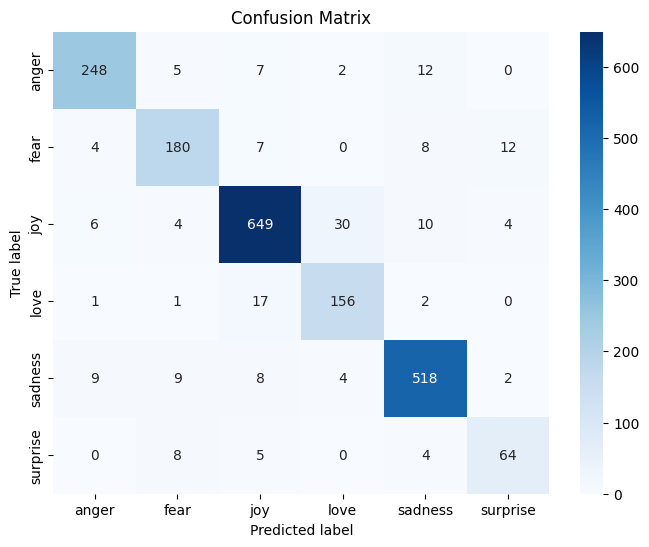

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_class_weight,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.234949,0.004426,0.010082,0.001637,0.1,None,100,"{'C': 0.1, 'class_weight': None, 'max_iter': 100}",0.460781,0.464463,0.471302,0.465515,0.004359,16
1,0.217273,0.008584,0.008159,0.000206,0.1,None,200,"{'C': 0.1, 'class_weight': None, 'max_iter': 200}",0.460781,0.464463,0.471302,0.465515,0.004359,16
2,0.233967,0.010273,0.008639,0.001497,0.1,None,500,"{'C': 0.1, 'class_weight': None, 'max_iter': 500}",0.460781,0.464463,0.471302,0.465515,0.004359,16
3,0.232348,0.014657,0.008559,0.000511,0.1,balanced,100,"{'C': 0.1, 'class_weight': 'balanced', 'max_it...",0.814464,0.805487,0.806958,0.808970,0.003931,13
4,0.215234,0.003781,0.007793,0.000176,0.1,balanced,200,"{'C': 0.1, 'class_weight': 'balanced', 'max_it...",0.814464,0.805487,0.806958,0.808970,0.003931,13
5,0.214138,0.017189,0.007808,0.000047,0.1,balanced,500,"{'C': 0.1, 'class_weight': 'balanced', 'max_it...",0.814464,0.805487,0.806958,0.808970,0.003931,13
6,0.326968,0.004460,0.008149,0.000027,1.0,None,100,"{'C': 1, 'class_weight': None, 'max_iter': 100}",0.836763,0.824660,0.832391,0.831271,0.005004,10
7,0.334300,0.012570,0.008172,0.000215,1.0,None,200,"{'C': 1, 'class_weight': None, 'max_iter': 200}",0.836763,0.824660,0.832391,0.831271,0.005004,10
8,0.316990,0.003531,0.008172,0.000218,1.0,None,500,"{'C': 1, 'class_weight': None, 'max_iter': 500}",0.836763,0.824660,0.832391,0.831271,0.005004,10
9,0.336403,0.011564,0.008200,0.000137,1.0,balanced,100,"{'C': 1, 'class_weight': 'balanced', 'max_iter...",0.899126,0.886205,0.890841,0.892058,0.005345,7


In [49]:
param_grid = {
    'C': [0.1, 1, 10],
    'max_iter': [100, 200, 500],
    'class_weight': [None, 'balanced']
}

log_best, log_grid = train_evaluate_model(
    LogisticRegression(solver='liblinear', random_state=42),
    param_grid,
    X_train, y_train,
    X_val, y_val,
    le,
    scoring='f1_weighted',
    cv=3,
    verbose=1
)


cv_results_df = pd.DataFrame(log_grid.cv_results_)
cv_results_df

## 2️⃣ Decision Tree

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best params: {'class_weight': None, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best cross-validation score: 0.8710693457715188

Validation Accuracy: 0.8898

Classification report on validation set:
              precision    recall  f1-score   support

       anger       0.87      0.88      0.87       274
        fear       0.81      0.84      0.83       211
         joy       0.93      0.92      0.92       703
        love       0.84      0.83      0.84       177
     sadness       0.90      0.91      0.91       550
    surprise       0.80      0.80      0.80        81

    accuracy                           0.89      1996
   macro avg       0.86      0.86      0.86      1996
weighted avg       0.89      0.89      0.89      1996



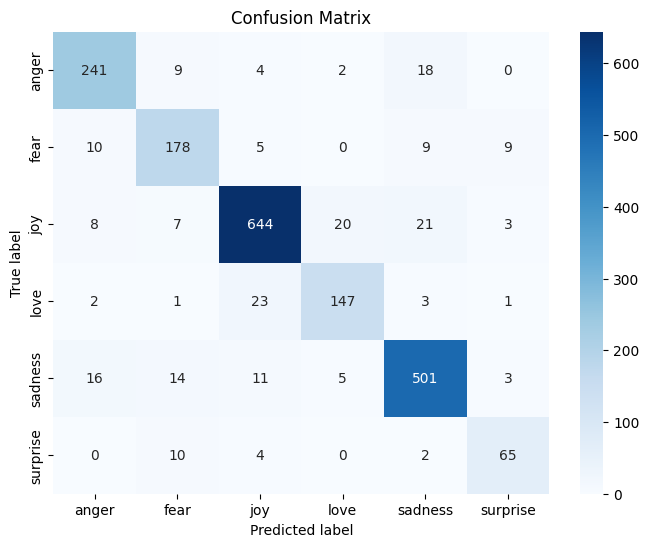

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,7.211756,2.326969,0.013882,0.000392,None,None,1,2,"{'class_weight': None, 'max_depth': None, 'min...",0.866632,0.868541,0.872470,0.869214,0.002430,3
1,7.429898,1.997518,0.018213,0.006784,None,None,1,5,"{'class_weight': None, 'max_depth': None, 'min...",0.866357,0.866802,0.877260,0.870140,0.005038,2
2,6.613808,0.627261,0.012779,0.000562,None,None,1,10,"{'class_weight': None, 'max_depth': None, 'min...",0.868727,0.867897,0.876584,0.871069,0.003914,1
3,6.363375,0.761305,0.012833,0.000653,None,None,2,2,"{'class_weight': None, 'max_depth': None, 'min...",0.853773,0.853966,0.863484,0.857074,0.004533,18
4,6.174820,0.891977,0.015269,0.001227,None,None,2,5,"{'class_weight': None, 'max_depth': None, 'min...",0.857947,0.857399,0.864480,0.859942,0.003216,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,1.788910,0.169994,0.009920,0.000975,balanced,50,2,5,"{'class_weight': 'balanced', 'max_depth': 50, ...",0.204046,0.198588,0.204134,0.202256,0.002594,52
68,2.878768,0.224763,0.012077,0.002264,balanced,50,2,10,"{'class_weight': 'balanced', 'max_depth': 50, ...",0.204223,0.198970,0.201655,0.201616,0.002145,54
69,1.785241,0.121975,0.009520,0.000331,balanced,50,5,2,"{'class_weight': 'balanced', 'max_depth': 50, ...",0.202763,0.201891,0.205476,0.203377,0.001527,49
70,1.769864,0.059136,0.012932,0.004532,balanced,50,5,5,"{'class_weight': 'balanced', 'max_depth': 50, ...",0.202763,0.201891,0.205476,0.203377,0.001527,49


In [50]:
dt_param_grid = {
    'max_depth': [None, 10, 20, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'class_weight': [None, 'balanced']
}

dt_best, dt_grid = train_evaluate_model(
    DecisionTreeClassifier(random_state=42),
    dt_param_grid,
    X_train, y_train,
    X_val, y_val,
    le,
    scoring='f1_weighted',
    cv=3,
    verbose=1
)

dt_cv_results_df = pd.DataFrame(dt_grid.cv_results_)
dt_cv_results_df

## 3️⃣ Random Forest

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best params: {'class_weight': None, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score: 0.8893930184762193

Validation Accuracy: 0.8988

Classification report on validation set:
              precision    recall  f1-score   support

       anger       0.92      0.87      0.89       274
        fear       0.81      0.90      0.85       211
         joy       0.93      0.92      0.92       703
        love       0.83      0.83      0.83       177
     sadness       0.91      0.93      0.92       550
    surprise       0.86      0.77      0.81        81

    accuracy                           0.90      1996
   macro avg       0.88      0.87      0.87      1996
weighted avg       0.90      0.90      0.90      1996



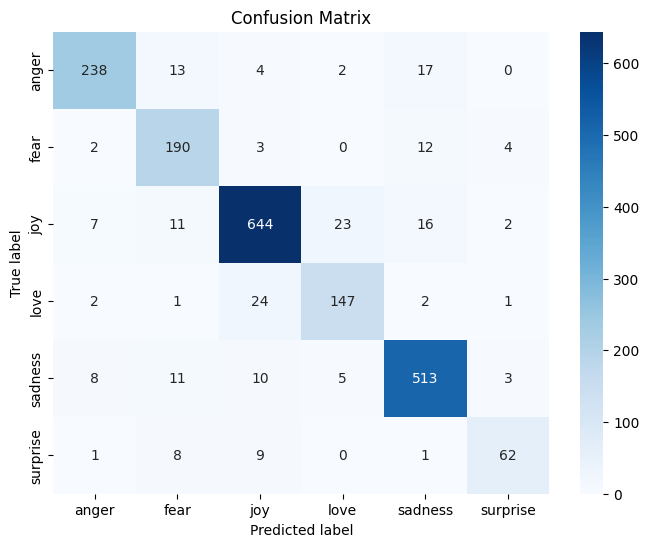

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,33.166415,0.343145,0.740520,0.035290,None,None,1,2,100,"{'class_weight': None, 'max_depth': None, 'min...",0.889844,0.884382,0.893645,0.889290,0.003802,2
1,62.438548,1.575289,1.447411,0.009095,None,None,1,2,200,"{'class_weight': None, 'max_depth': None, 'min...",0.889727,0.885008,0.893444,0.889393,0.003452,1
2,26.597489,0.141977,0.728601,0.024072,None,None,1,5,100,"{'class_weight': None, 'max_depth': None, 'min...",0.886256,0.881743,0.890502,0.886167,0.003577,4
3,54.044133,0.145436,1.446365,0.070245,None,None,1,5,200,"{'class_weight': None, 'max_depth': None, 'min...",0.889261,0.882371,0.891331,0.887654,0.003830,3
4,17.685334,0.170708,0.766002,0.186940,None,None,2,2,100,"{'class_weight': None, 'max_depth': None, 'min...",0.884034,0.874048,0.887186,0.881756,0.005600,11
5,36.198542,0.774143,1.512141,0.431530,None,None,2,2,200,"{'class_weight': None, 'max_depth': None, 'min...",0.884732,0.874379,0.887947,0.882352,0.005789,7
6,16.813217,0.021046,0.602458,0.023004,None,None,2,5,100,"{'class_weight': None, 'max_depth': None, 'min...",0.884047,0.874506,0.887488,0.882014,0.005492,9
7,34.420727,0.982959,1.228264,0.027882,None,None,2,5,200,"{'class_weight': None, 'max_depth': None, 'min...",0.884538,0.874427,0.887801,0.882255,0.005693,8
8,3.049706,0.137798,0.115602,0.018718,None,20,1,2,100,"{'class_weight': None, 'max_depth': 20, 'min_s...",0.385817,0.401987,0.384230,0.390678,0.008023,41
9,6.984883,0.693546,0.246005,0.047479,None,20,1,2,200,"{'class_weight': None, 'max_depth': 20, 'min_s...",0.383888,0.393593,0.358926,0.378802,0.014603,45


In [51]:
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 20, 50],
    'class_weight': [None, 'balanced'],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_grid_best, rf_grid = train_evaluate_model(
    RandomForestClassifier(random_state=42),
    rf_param_grid,
    X_train, y_train,
    X_val, y_val,
    le,
    scoring='f1_weighted',
    cv=3,
    verbose=1
)

rf_cv_results_df = pd.DataFrame(rf_grid.cv_results_)
rf_cv_results_df

## 4️⃣ SVM

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best params: {'C': 1, 'class_weight': 'balanced', 'max_iter': 1000}
Best cross-validation score: 0.9049610560357096

Validation Accuracy: 0.9083

Classification report on validation set:
              precision    recall  f1-score   support

       anger       0.92      0.91      0.91       274
        fear       0.87      0.85      0.86       211
         joy       0.94      0.91      0.93       703
        love       0.81      0.90      0.85       177
     sadness       0.93      0.94      0.94       550
    surprise       0.76      0.81      0.79        81

    accuracy                           0.91      1996
   macro avg       0.87      0.89      0.88      1996
weighted avg       0.91      0.91      0.91      1996



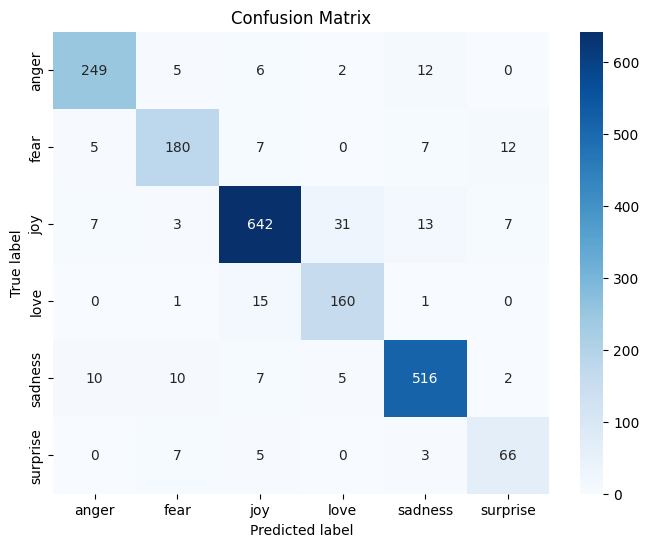

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_class_weight,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.521463,0.013158,0.014688,0.004968,0.1,None,1000,"{'C': 0.1, 'class_weight': None, 'max_iter': 1...",0.870154,0.859784,0.870922,0.866953,0.005079,11
1,0.454228,0.061013,0.015237,0.003351,0.1,None,2000,"{'C': 0.1, 'class_weight': None, 'max_iter': 2...",0.870154,0.859784,0.870922,0.866953,0.005079,11
2,0.462996,0.033339,0.014337,0.003268,0.1,balanced,1000,"{'C': 0.1, 'class_weight': 'balanced', 'max_it...",0.906522,0.892822,0.900599,0.899981,0.005610,3
3,0.456894,0.023827,0.013468,0.004446,0.1,balanced,2000,"{'C': 0.1, 'class_weight': 'balanced', 'max_it...",0.906522,0.892822,0.900599,0.899981,0.005610,3
4,0.473088,0.056526,0.009225,0.001111,1.0,None,1000,"{'C': 1, 'class_weight': None, 'max_iter': 1000}",0.900803,0.894768,0.900088,0.898553,0.002692,5
5,0.392008,0.000743,0.008671,0.000298,1.0,None,2000,"{'C': 1, 'class_weight': None, 'max_iter': 2000}",0.900803,0.894768,0.900088,0.898553,0.002692,5
6,0.421582,0.019620,0.008849,0.000383,1.0,balanced,1000,"{'C': 1, 'class_weight': 'balanced', 'max_iter...",0.908004,0.901215,0.905664,0.904961,0.002816,1
7,0.424590,0.015941,0.008728,0.000006,1.0,balanced,2000,"{'C': 1, 'class_weight': 'balanced', 'max_iter...",0.908004,0.901215,0.905664,0.904961,0.002816,1
8,0.754712,0.034298,0.008581,0.000246,10.0,None,1000,"{'C': 10, 'class_weight': None, 'max_iter': 1000}",0.884606,0.880262,0.889670,0.884846,0.003845,9
9,0.842700,0.076751,0.008501,0.000127,10.0,None,2000,"{'C': 10, 'class_weight': None, 'max_iter': 2000}",0.884606,0.880262,0.889670,0.884846,0.003845,9


In [52]:
svc_param_grid = {
    'C': [0.1, 1, 10],
    'class_weight': [None, 'balanced'],
    'max_iter': [1000, 2000]
}

svc_grid_best, svc_grid = train_evaluate_model(
    LinearSVC(dual=False, random_state=42),
    svc_param_grid,
    X_train, y_train,
    X_val, y_val,
    le,
    scoring='f1_weighted',
    cv=3,
    verbose=1
)

svc_cv_results_df = pd.DataFrame(svc_grid.cv_results_)
svc_cv_results_df

In [53]:
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVC']

results = []

models = [
    (log_best, log_grid, 'Logistic Regression'),
    (dt_best, dt_grid, 'Decision Tree'),
    (rf_grid_best, rf_grid, 'Random Forest'),
    (svc_grid_best, svc_grid, 'SVC')
]

for model, grid, name in models:
    # Predict on validation data
    val_pred = model.predict(X_val)
    acc = accuracy_score(y_val, val_pred)
    f1 = f1_score(y_val, val_pred, average='weighted')
    results.append({
        'Model': name,
        'Best Params': grid.best_params_,
        'Best CV Score': f"{grid.best_score_:.4f}",
        'Validation Accuracy': f"{acc:.4f}",
        'F1 (weighted)': f"{f1:.4f}"
    })

results_df = pd.DataFrame(results)

with pd.option_context('display.max_colwidth', None, 'display.width', 0):
    display(results_df)

,Model,Best Params,Best CV Score,Validation Accuracy,F1 (weighted)
0,Logistic Regression,"{'C': 10, 'class_weight': 'balanced', 'max_iter': 100}",0.9016,0.9093,0.9096
1,Decision Tree,"{'class_weight': None, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}",0.8711,0.8898,0.8900
2,Random Forest,"{'class_weight': None, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}",0.8894,0.8988,0.8988
3,SVC,"{'C': 1, 'class_weight': 'balanced', 'max_iter': 1000}",0.9050,0.9083,0.9088


# Fitting TF-IDF Vectorized On Balanced Data with Augmentation

<div style="background-color:#D6EAF8; padding:20px; border-radius:10px; box-shadow:0 4px 6px rgba(0,0,0,0.1);">

<p>
We will try multiple models on the <strong>TF-IDF</strong> vectorized <strong>balanced with augmentation</strong> data.
</p>

</div>


In [ ]:
# Fit on balanced training set, transform validation and test
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1,2))

X_train2 = vectorizer.fit_transform(balanced_train_df['final_text'])
X_val2 = vectorizer.transform(val_df_clean['clean_text'])
X_test2 = vectorizer.transform(test_df_clean['clean_text'])

In [ ]:
le2 = LabelEncoder()
y_train2 = le2.fit_transform(balanced_train_df['label'])
y_val2 = le2.transform(val_df_clean['label'])
y_test2 = le2.transform(test_df_clean['label'])

## 1️⃣ Logestic Regression (Augmented)

In [ ]:
log_param_grid2 = {
    'C': [0.1, 1, 10],
    'max_iter': [100, 200, 500],
}

log_best2, log_grid2 = train_evaluate_model(
    LogisticRegression(solver='liblinear', random_state=42),
    log_param_grid2,
    X_train2, y_train2,
    X_val2, y_val2,
    le2,
    scoring='f1_weighted',
    cv=3,
    verbose=1
)

log_cv_results_df2 = pd.DataFrame(log_grid2.cv_results_)
log_cv_results_df2

## 2️⃣ Decision Tree (Augmented)

In [ ]:
dt_param_grid2 = {
    'max_depth': [None, 10, 20, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
}

dt_best2, dt_grid2 = train_evaluate_model(
    DecisionTreeClassifier(random_state=42),
    dt_param_grid2,
    X_train2, y_train2,
    X_val2, y_val2,
    le2,
    scoring='f1_weighted',
    cv=3,
    verbose=1
)

dt_cv_results_df2 = pd.DataFrame(dt_grid2.cv_results_)
dt_cv_results_df2

## 3️⃣ Random Forest (Augmented)

In [ ]:
rf_param_grid2 = {
    'n_estimators': [100, 200],
    'max_depth': [None, 20, 50],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_best2, rf_grid2 = train_evaluate_model(
    RandomForestClassifier(random_state=42),
    rf_param_grid2,
    X_train2, y_train2,
    X_val2, y_val2,
    le2,
    scoring='f1_weighted',
    cv=3,
    verbose=1
)

rf_cv_results_df2 = pd.DataFrame(rf_grid2.cv_results_)
rf_cv_results_df2

## 4️⃣ SVM (Augmented)

In [ ]:
svc_param_grid2 = {
    'C': [0.1, 1, 10],
    'max_iter': [1000, 2000]
}

svc_best2, svc_grid2 = train_evaluate_model(
    LinearSVC(dual=False, random_state=42),
    svc_param_grid2,
    X_train2, y_train2,
    X_val2, y_val2,
    le2,
    scoring='f1_weighted',
    cv=3,
    verbose=1
)

svc_cv_results_df2 = pd.DataFrame(svc_grid2.cv_results_)
svc_cv_results_df2

In [ ]:
results = []

# List: (best_estimator, grid_object, model_name, X_val, y_val)
models = [
    (log_best, log_grid, 'Logistic Regression', X_val, y_val),
    (dt_best, dt_grid, 'Decision Tree', X_val, y_val),
    (rf_grid_best, rf_grid, 'Random Forest', X_val, y_val),
    (svc_grid_best, svc_grid, 'SVC', X_val, y_val),
    (log_best2, log_grid2, 'Logistic Regression (augmented)', X_val2, y_val2),
    (dt_best2, dt_grid2, 'Decision Tree (augmented)', X_val2, y_val2),
    (rf_best2, rf_grid2, 'Random Forest (augmented)', X_val2, y_val2),
    (svc_best2, svc_grid2, 'SVC (augmented)', X_val2, y_val2),
]

for model, grid, name, Xv, yv in models:
    val_pred = model.predict(Xv)
    acc = accuracy_score(yv, val_pred)
    f1 = f1_score(yv, val_pred, average='weighted')
    results.append({
        'Model': name,
        'Best Params': grid.best_params_,
        'Best CV Score': f"{grid.best_score_:.4f}",
        'Validation Accuracy': f"{acc:.4f}",
        'F1 (weighted)': f"{f1:.4f}"
    })

results_df_classic = pd.DataFrame(results)

with pd.option_context('display.max_colwidth', None, 'display.width', 0):
    display(results_df_classic)

#  Integrating BPE Tokenization with Neural Networks

<div style="background-color:#E8F8F5; padding:20px; border-radius:14px; box-shadow:0 4px 6px rgba(0,0,0,0.1);">

<p>
In the next section, we'll process our text data using <strong>BPE tokenization</strong> and use these tokenized sequences as input to a custom neural network model for classification.
</p>

</div>


# BPE Tokenization: A Detailed Overview

<div style="background-color:#E8F8F5; padding:20px; border-radius:14px; box-shadow:0 4px 6px rgba(0,0,0,0.1);">

<p>
  <strong>Byte Pair Encoding (BPE)</strong> is a subword tokenization algorithm that iteratively merges frequent pairs of characters or subwords in a corpus to create a vocabulary of compact tokens. It helps language models handle rare or out-of-vocabulary words by representing them as subword combinations. BPE is widely used in natural language processing (NLP) for its flexibility across languages. This overview shows how BPE builds a vocabulary, tokenizes a sentence, and why limiting vocabulary size matters.
</p>

<hr>

<h2>
  <span style="background-color:#fffde7; font-weight:bold; padding:4px 12px; border-radius:8px;">What is BPE?</span>
</h2>

<p>
  <strong>BPE (Byte Pair Encoding)</strong> builds a vocabulary by merging frequently occurring pairs of characters or subwords into single tokens, balancing vocabulary size and word representation.
</p>

<ul style="font-size:15.5px; color:#222; line-height:1.7;">
  <li>
    <strong>Subword Segmentation:</strong> Words are split into smaller units (subwords). For example, "unhappiness" might be tokenized as
    <span style="background-color:#fffde7; font-weight:bold; padding:2px 6px; border-radius:6px;">un</span>,
    <span style="background-color:#fffde7; font-weight:bold; padding:2px 6px; border-radius:6px;">hap</span>,
    <span style="background-color:#fffde7; font-weight:bold; padding:2px 6px; border-radius:6px;">pi</span>,
    <span style="background-color:#fffde7; font-weight:bold; padding:2px 6px; border-radius:6px;">ness</span> based on the vocabulary.
  </li>
  <li>
    <strong>Example:</strong>
    With a vocabulary <code>{u, n, h, a, p, i, s, un, hap, pi, ness}</code>, "unhappiness" is tokenized as:
    <ul>
      <li>Initial split: <code>u n h a p p i n e s s</code></li>
      <li>After merges: <code>un hap pi ness</code></li>
      <li>Final tokens: <code>[un, hap, pi, ness]</code></li>
    </ul>
  </li>
  <li>
    <strong>Merging Frequent Pairs:</strong>
    The algorithm merges the most frequent pair of adjacent tokens (e.g., <code>h</code> and <code>e</code> into <code>he</code>), adding the new token to the vocabulary while keeping original tokens.
  </li>
</ul>

<hr>

<h2>
  <span style="background-color:#fffde7; font-weight:bold; padding:4px 12px; border-radius:8px;">How BPE Tokenization Works</span>
</h2>

<ol style="font-size:15.5px; color:#222; line-height:1.7; margin-bottom:1em;">
  <li><strong>Text Preprocessing:</strong> Split text into words, representing each as characters with an end-of-word symbol (e.g., <code>&lt;/w&gt;</code>). Text is often lowercased to match the vocabulary.</li>
  <li><strong>Finding Frequent Pairs:</strong> Count frequencies of adjacent token pairs in the corpus.</li>
  <li><strong>Merging Pairs:</strong> Merge the most frequent pair into a new token, add it to the vocabulary, and update the corpus.</li>
  <li><strong>Iterative Process:</strong> Repeat steps 2-3 until a predefined number of merges or vocabulary size is reached.</li>
  <li><strong>Vocabulary Size Control:</strong> Merging stops after a set number of merges (e.g., 10,000) or a target vocabulary size, ensuring efficiency.</li>
</ol>

<p>The vocabulary grows with each merge, retaining original tokens for flexibility.</p>

<hr>

<h2>
  <span style="background-color:#fffde7; font-weight:bold; padding:4px 12px; border-radius:8px;">Why Limit Vocabulary Size?</span>
</h2>

<p>Limiting the vocabulary size in BPE is crucial for generalization, preventing overfitting, and ensuring computational efficiency:</p>
<ul style="font-size:15.5px; color:#222; line-height:1.7;">
  <li><strong>Generalization:</strong> A limited vocabulary captures frequent subword patterns (e.g., <code>play</code>, <code>ing</code>) rather than whole rare words (e.g., <code>xylophone</code>). This allows the model to tokenize unseen words by combining known subwords, improving performance on new text.</li>
  <li><strong>Preventing Overfitting:</strong> An overly large vocabulary may memorize rare or noisy tokens from the training corpus, reducing performance on out-of-domain text. Limiting merges avoids overfitting to specific words.</li>
  <li><strong>Efficiency:</strong> A smaller vocabulary reduces memory and computational costs, as the model handles fewer unique tokens.</li>
  <li><strong>Example:</strong> Suppose the corpus contains "playing" frequently but not "playful". An unlimited vocabulary might include <code>playing&lt;/w&gt;</code> as a single token, overfitting to the training data. Tokenizing "playful" might result in <code>[p, l, a, y, f, u, l, &lt;/w&gt;]</code>, missing shared structure. A limited vocabulary with tokens like <code>play</code> and <code>ing</code> tokenizes "playing" as <code>[play, ing, &lt;/w&gt;]</code> and "playful" as <code>[play, ful, &lt;/w&gt;]</code> (if <code>ful</code> is learned), generalizing better to unseen words.</li>
</ul>

<hr>

<h2>
  <span style="background-color:#fffde7; font-weight:bold; padding:4px 12px; border-radius:8px;">Example of BPE Tokenization</span>
</h2>

<p>We use a small corpus to show vocabulary creation and tokenize a sentence. The corpus is lowercased for consistency, as is common in BPE to reduce vocabulary size.</p>

<ul style="margin-bottom:1em;">
  <li><strong>DOC1:</strong> "the cat sat on the mat"</li>
  <li><strong>DOC2:</strong> "the dog sat on the mat"</li>
  <li><strong>DOC3:</strong> "a cat chased a dog"</li>
  <li><strong>DOC4:</strong> "the quick brown fox jumps over the lazy dog"</li>
  <li><strong>DOC5:</strong> "the fox is quick and the dog is lazy"</li>
</ul>

<hr>

<h3>
  <span style="background-color:#fffde7; font-weight:bold; padding:2px 8px; border-radius:8px;">Step 1: Initial Split</span>
</h3>

<p>Each word is split into characters with <code>&lt;/w&gt;</code>:</p>
<ul style="margin-bottom:1em;">
  <li>DOC1: <code>t h e &lt;/w&gt; c a t &lt;/w&gt; s a t &lt;/w&gt; o n &lt;/w&gt; t h e &lt;/w&gt; m a t &lt;/w&gt;</code></li>
  <li>DOC2: <code>t h e &lt;/w&gt; d o g &lt;/w&gt; s a t &lt;/w&gt; o n &lt;/w&gt; t h e &lt;/w&gt; m a t &lt;/w&gt;</code></li>
  <li>DOC3: <code>a &lt;/w&gt; c a t &lt;/w&gt; c h a s e d &lt;/w&gt; a &lt;/w&gt; d o g &lt;/w&gt;</code></li>
  <li>DOC4: <code>t h e &lt;/w&gt; q u i c k &lt;/w&gt; b r o w n &lt;/w&gt; f o x &lt;/w&gt; j u m p s &lt;/w&gt; o v e r &lt;/w&gt; t h e &lt;/w&gt; l a z y &lt;/w&gt; d o g &lt;/w&gt;</code></li>
  <li>DOC5: <code>t h e &lt;/w&gt; f o x &lt;/w&gt; i s &lt;/w&gt; q u i c k &lt;/w&gt; a n d &lt;/w&gt; t h e &lt;/w&gt; d o g &lt;/w&gt; i s &lt;/w&gt; l a z y &lt;/w&gt;</code></li>
</ul>

<p>
  <strong>Initial Vocabulary</strong> (unique characters, starting with <code>t</code> for clarity):
  <br>
  <code>{t, h, e, , a, b, c, d, f, g, i, j, k, l, m, n, o, p, q, r, s, u, v, w, x, y, z}</code>
</p>
<p>
  <strong>Vocabulary size:</strong> 27 tokens.
</p>

<hr>

<h3>
  <span style="background-color:#fffde7; font-weight:bold; padding:2px 8px; border-radius:8px;">Step 2: Find and Merge Frequent Pairs</span>
</h3>

<p>We count pair frequencies (assuming each document appears once). The pair <code>t h</code> is frequent (in <code>the</code>).</p>

<ul>
  <li>
    <strong>Merge 1: <code>t h</code> → <code>th</code></strong>
    <ul>
      <li>Add <code>th</code> to vocabulary.</li>
      <li>Update corpus: <code>t h e &lt;/w&gt;</code> → <code>th e &lt;/w&gt;</code>.</li>
      <li>Vocabulary: <code>{..., th}</code></li>
      <li>Size: 28 tokens.</li>
    </ul>
  </li>
  <li>
    <strong>Merge 2: <code>th e</code> → <code>the</code></strong>
    <ul>
      <li>Add <code>the</code> to vocabulary.</li>
      <li>Update corpus: <code>th e &lt;/w&gt;</code> → <code>the &lt;/w&gt;</code>.</li>
      <li>Vocabulary: <code>{..., the}</code></li>
      <li>Size: 29 tokens.</li>
    </ul>
  </li>
  <li>
    <strong>Merge 3: <code>the &lt;/w&gt;</code> → <code>the&lt;/w&gt;</code></strong>
    <ul>
      <li>Add <code>the&lt;/w&gt;</code> to vocabulary.</li>
      <li>Update corpus: <code>the &lt;/w&gt;</code> → <code>the&lt;/w&gt;</code>.</li>
      <li>Vocabulary: <code>{..., the&lt;/w&gt;}</code></li>
      <li>Size: 30 tokens.</li>
    </ul>
  </li>
  <li>
    <strong>Merge 4: <code>s a</code> → <code>sa</code></strong>
    <ul>
      <li>Add <code>sa</code> to vocabulary.</li>
      <li>Update corpus: <code>s a t &lt;/w&gt;</code> → <code>sa t &lt;/w&gt;</code>.</li>
      <li>Vocabulary: <code>{..., sa}</code></li>
      <li>Size: 31 tokens.</li>
    </ul>
  </li>
  <li>
    <strong>Merge 5: <code>sa t</code> → <code>sat</code></strong>
    <ul>
      <li>Add <code>sat</code> to vocabulary.</li>
      <li>Update corpus: <code>sa t &lt;/w&gt;</code> → <code>sat &lt;/w&gt;</code>.</li>
      <li>Vocabulary: <code>{..., sat}</code></li>
      <li>Size: 32 tokens.</li>
    </ul>
  </li>
</ul>

<p><strong>Stop</strong>: We stop after 5 merges for simplicity. In practice, merging continues for thousands of merges.</p>

<hr>

<h3>
  <span style="background-color:#fffde7; font-weight:bold; padding:2px 8px; border-radius:8px;">Step 3: Tokenize a Sentence</span>
</h3>

<p>Tokenize <strong>"a fox fled from danger"</strong> using the vocabulary:</p>
<p>
  <code>{t, h, e, , a, b, c, d, f, g, i, j, k, l, m, n, o, p, q, r, s, u, v, w, x, y, z, th, the, the, sa, sat}</code>
</p>

<p>
  <strong>Note:</strong> The input sentence is lowercased to match the vocabulary trained on a lowercased corpus, ensuring tokens like <code>the&lt;/w&gt;</code> can be matched.
</p>

<ul>
  <li><strong>Split into Words:</strong></li>
  <ul>
    <li><code>a</code> → <code>a &lt;/w&gt;</code></li>
    <li><code>fox</code> → <code>f o x &lt;/w&gt;</code></li>
    <li><code>fled</code> → <code>f l e d &lt;/w&gt;</code></li>
    <li><code>from</code> → <code>f r o m &lt;/w&gt;</code></li>
    <li><code>danger</code> → <code>d a n g e r &lt;/w&gt;</code></li>
  </ul>
  <li><strong>Tokenize Each Word</strong> (apply merges):</li>
  <ul>
    <li><strong>a</strong>: <code>a &lt;/w&gt;</code> — No merges apply: <code>[a, &lt;/w&gt;]</code></li>
    <li><strong>fox</strong>: <code>f o x &lt;/w&gt;</code> — No merges apply: <code>[f, o, x, &lt;/w&gt;]</code></li>
    <li><strong>fled</strong>: <code>f l e d &lt;/w&gt;</code> — No merges apply: <code>[f, l, e, d, &lt;/w&gt;]</code></li>
    <li><strong>from</strong>: <code>f r o m &lt;/w&gt;</code> — No merges apply: <code>[f, r, o, m, &lt;/w&gt;]</code></li>
    <li><strong>danger</strong>: <code>d a n g e r &lt;/w&gt;</code> — No merges apply: <code>[d, a, n, g, e, r, &lt;/w&gt;]</code></li>
  </ul>
</ul>

<p>
  <strong>Final Tokenized Output:</strong>
  <br>
  [a, , f, o, x, , f, l, e, d, , f, r, o, m, , d, a, n, g, e, r, ]
</p>

<h3>Step 4: Stop Merging</h3>
<p>We stopped after 5 merges for this example. In real applications, merging continues to balance granularity and efficiency.</p>

<hr>

<h2>
  <span style="background-color:#fffde7; font-weight:bold; padding:4px 12px; border-radius:8px;">Summary of BPE Process</span>
</h2>

<ol style="font-size:15.5px; color:#222; line-height:1.7;">
  <li><strong>Initial Split:</strong> Split words into characters with <code>&lt;/w&gt;</code>.</li>
  <li><strong>Find Frequent Pair:</strong> Merge the most frequent pair, adding the new token to the vocabulary without removing original tokens.</li>
  <li><strong>Repeat:</strong> Continue merging and updating the corpus.</li>
  <li><strong>Tokenization:</strong> Tokenize text by applying merges in order, prioritizing longer tokens.</li>
  <li><strong>Vocabulary Growth:</strong> Each merge adds a token, growing the vocabulary while keeping all tokens.</li>
</ol>

<p>
  This enables efficient handling of rare words by breaking them into subwords.
</p>

<hr>

<h2>
  <span style="background-color:#fffde7; font-weight:bold; padding:4px 12px; border-radius:8px;">LLMs that Use BPE</span>
</h2>

<ul style="font-size:15.5px; color:#222; line-height:1.7;">
  <li><strong>GPT-3 and GPT-4:</strong> Use BPE for robust handling of diverse languages.</li>
  <li><strong>BERT:</strong> Uses WordPiece, a BPE variant with a likelihood-based merging strategy.</li>
</ul>

</div>


<div style="background-color:#E8F8F5; padding:20px; border-radius:10px; box-shadow:0 4px 6px rgba(0,0,0,0.1);">

<h1>
  <span style="background-color:#000000; color:white; padding:6px 16px; border-radius:12px; box-shadow: 2px 2px 8px rgba(0,0,0,0.1);">
    Adjusted Cleaning Strategy for BPE & Neural Networks
  </span>
</h1>

<p>
  In this section, a different text cleaning process will be applied to the original data compared to the previous TF-IDF pipeline.<br>
  This time, cleaning will be minimal to better fit BPE tokenization and neural network models.
</p>

<hr>

<ul style="margin-top:18px;">
  <li>
    For <strong>TF-IDF</strong>, heavy cleaning was used due to TF-IDF's sensitivity to noise.
  </li>
  <li>
    For <strong>BPE</strong> and <strong>neural networks</strong>, minimal cleaning is applied since these models effectively handle natural text variations with less impact on performance.
  </li>
</ul>

</div>


# Data Preprocessing Steps for BPE & Neural Networks

<div style="background-color:#E8F8F5; padding:20px; border-radius:10px; box-shadow:0 4px 6px rgba(0,0,0,0.1);">

<p>
  For <strong>BPE tokenization</strong> and <strong>neural network models</strong>, only minimal text cleaning will be performed:
</p>

<hr>

<ul style="margin-top:18px;">
  <li>Convert text to lowercase</li>
  <li>Remove mentions</li>
  <li>Remove hashtags</li>
  <li>Remove URLs</li>
  <li>Remove numbers</li>
  <li>Remove only-mentions tweets</li>
  <li>Remove punctuation and special characters (except basic punctuation)</li>
  <li>Strip extra spaces</li>
</ul>

<p>
  <strong>No stopword removal or lemmatization</strong> will be applied for this setup. All other cleaning parameters remain at their function defaults.
</p>

</div>


In [ ]:
train_df_clean2 = train_df.copy()
val_df_clean2 = val_df.copy()
test_df_clean2 = test_df.copy()

train_df_clean2['clean_text'] = train_df['text'].progress_apply(lambda x: clean_text(x, remove_stopwords=False, lemmatize=False))
val_df_clean2['clean_text']   = val_df['text'].progress_apply(lambda x: clean_text(x, remove_stopwords=False, lemmatize=False))
test_df_clean2['clean_text']  = test_df['text'].progress_apply(lambda x: clean_text(x, remove_stopwords=False, lemmatize=False))

In [ ]:
# Testing
# Your new input
my_text = "I can’t even, this is such a vibe!"

# Clean the text just like your training data
cleaned_my_text = clean_text(
    my_text,
    remove_stopwords=False,
    lemmatize=False,
)

cleaned_my_text

In [ ]:
train_df_clean2.head()

In [ ]:
from tokenizers import Tokenizer, pre_tokenizers, trainers
from tokenizers.models import BPE

In [ ]:
def train_and_tokenize_bpe(
    train_texts,
    val_texts,
    test_texts,
    vocab_size=10000,
    pad_token="[PAD]",
    unk_token="[UNK]",
    maxlen=32
):
    train_texts = [str(t) for t in train_texts]
    val_texts = [str(t) for t in val_texts]
    test_texts = [str(t) for t in test_texts]

    tokenizer = Tokenizer(BPE())
    tokenizer.pre_tokenizer = pre_tokenizers.Whitespace()
    trainer = trainers.BpeTrainer(
        vocab_size=vocab_size,
        special_tokens=[pad_token, unk_token]
    )
    tokenizer.train_from_iterator(train_texts, trainer=trainer)

    pad_token_id = tokenizer.token_to_id(pad_token)

    def tokenize_row(text):
        encoding = tokenizer.encode(str(text))
        return encoding.tokens, encoding.ids

    def tokenize_df(texts):
        out = pd.Series(texts).apply(lambda x: pd.Series(tokenize_row(x)))
        out.columns = ['bpe_tokens', 'bpe_token_ids']
        df = pd.DataFrame({"text": texts})
        df[['bpe_tokens', 'bpe_token_ids']] = out
        return df

    train_df = tokenize_df(train_texts)
    val_df = tokenize_df(val_texts)
    test_df = tokenize_df(test_texts)


    train_padded = pad_sequences(train_df['bpe_token_ids'].tolist(), maxlen=maxlen, padding='post', truncating='post', value=pad_token_id)
    val_padded   = pad_sequences(val_df['bpe_token_ids'].tolist(),   maxlen=maxlen, padding='post', truncating='post', value=pad_token_id)
    test_padded  = pad_sequences(test_df['bpe_token_ids'].tolist(),  maxlen=maxlen, padding='post', truncating='post', value=pad_token_id)

    return tokenizer, pad_token_id, train_padded, val_padded, test_padded, train_df, val_df, test_df

In [ ]:
train_df_clean2

In [ ]:
tokenizer_BPE, pad_token_id, train_padded, val_padded, test_padded, train_df_tok, val_df_tok, test_df_tok = train_and_tokenize_bpe(
    train_df_clean2["clean_text"],
    val_df_clean2["clean_text"],
    test_df_clean2["clean_text"],
    maxlen=32
)

In [ ]:
le = LabelEncoder()
train_labels = le.fit_transform(train_df_clean2['label'])
val_labels = le.transform(val_df_clean2['label'])
test_labels = le.transform(test_df_clean2['label'])

In [ ]:
print(f"Train padded shape:      {train_padded.shape}")
print(f"Train labels shape:      {train_labels.shape}")
print(f"Validation padded shape: {val_padded.shape}")
print(f"Validation labels shape:      {val_labels.shape}")
print(f"Test padded shape:       {test_padded.shape}")
print(f"Test labels shape:      {test_labels.shape}")

# Neural Network Model & Tuning

<div style="background-color:#E8F8F5; padding:20px; border-radius:14px; box-shadow:0 4px 8px rgba(0,0,0,0.08);">

<p>
  We’re building a neural network to classify the sentiment of tweets.
  The model takes each tweet, represents it with
  <span style="background-color:#fffde7; color:#222; padding:2px 8px; border-radius:8px;">word embeddings</span>,
  and uses <span style="background-color:#fffde7; color:#222; padding:2px 8px; border-radius:8px;">attention</span>
  to figure out which words matter most for understanding the emotion.
  It passes the information through a couple of
  <span style="background-color:#fffde7; color:#222; padding:2px 8px; border-radius:8px;">dense layers</span>,
  averages everything into a single vector, and finally predicts one of
  <span style="background-color:#fffde7; color:#222; padding:2px 8px; border-radius:8px;">six sentiment classes</span>.
</p>

<p>
  To get the best results, we tune the key hyperparameters:
</p>
<ul style="margin-bottom:0.8em; color:#222; font-size:15.5px;">
  <li><span style="background-color:#fffde7; color:#222; padding:2px 8px; border-radius:8px;">embedding dimension</span></li>
  <li><span style="background-color:#fffde7; color:#222; padding:2px 8px; border-radius:8px;">number of attention heads</span></li>
  <li><span style="background-color:#fffde7; color:#222; padding:2px 8px; border-radius:8px;">dense layer sizes</span></li>
  <li><span style="background-color:#fffde7; color:#222; padding:2px 8px; border-radius:8px;">dropout rates</span></li>
</ul>
<p>
  We use <span style="background-color:#fffde7; color:#222; padding:2px 8px; border-radius:8px;">KerasTuner</span>
  to test different combinations, pick the one that performs best on validation, and report our results with both
  <span style="background-color:#fffde7; color:#222; padding:2px 8px; border-radius:8px;">accuracy</span> and
  <span style="background-color:#fffde7; color:#222; padding:2px 8px; border-radius:8px;">weighted F1 score</span>.
</p>

</div>


In [ ]:
def build_model(hp, tokenizer):

    inputs = layers.Input(shape=(32,))

    x = layers.Embedding(input_dim=tokenizer.get_vocab_size(), output_dim=hp.Choice('embedding_dim', [64, 128, 256]) )(inputs)

    x = layers.Dropout(hp.Float('embedding_dropout', 0.1, 0.5, step=0.1))(x)

    x = layers.MultiHeadAttention(num_heads=hp.Choice('num_heads', [4, 8, 12]),key_dim=hp.Choice('key_dim', [64, 128]))(x, x)

    x = layers.LayerNormalization(epsilon=1e-6)(x)

    x = layers.Dense(hp.Int('dense_units_1', min_value=128, max_value=512, step=64), activation='relu')(x)

    x = layers.Dropout(hp.Float('dense_dropout', 0.1, 0.5, step=0.1))(x)

    x = layers.Dense(hp.Int('dense_units_2', min_value=64, max_value=256, step=64), activation='relu')(x)

    x = layers.GlobalAveragePooling1D()(x)

    outputs = layers.Dense(6, activation='softmax')(x)

    model = Model(inputs, outputs)

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# 1️⃣ Training the Neural Network with Class Weights

In [ ]:
tuner = kt.RandomSearch(
    lambda hp: build_model(hp, tokenizer_BPE),
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='my_dir',
    project_name='my_project'
)

In [ ]:
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_labels),
    y=train_labels
)

class_weights = dict(enumerate(class_weights))
class_weights

In [ ]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [ ]:
tuner.search(
    train_padded, train_labels,
    validation_data=(val_padded, val_labels),
    epochs=50,
    class_weight=class_weights,
    callbacks=[early_stop]
)

In [ ]:
best_model_nn = tuner.get_best_models(num_models=1)[0]
best_model_nn.summary()

In [ ]:
y_pred_probs = best_model_nn.predict(val_padded)
y_pred = np.argmax(y_pred_probs, axis=1)

f1 = f1_score(val_labels, y_pred, average='weighted')
print("Weighted F1 Score:", f1)

In [ ]:
best_trial = tuner.oracle.get_best_trials(num_trials=1)[0]
val_acc = best_trial.metrics.get_last_value('val_accuracy')
print("Best model validation accuracy:", val_acc)

In [ ]:
cm_nn1 = confusion_matrix(val_labels, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm_nn1,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=le.classes_,
    yticklabels=le.classes_
)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best hyperparameters:")
print(best_hp.values)

# 2️⃣ Training the Neural Network with Data Augmented

In [ ]:
balanced_train_df2 = balance_with_augmentation(train_df_clean2, text_col='text', label_col='label', clean_col='clean_text')

In [ ]:
balanced_train_df2

In [ ]:
balanced_train_df2['clean_text'] = balanced_train_df2['final_text'].progress_apply(lambda x: clean_text(x, remove_stopwords=False, lemmatize=False))

In [ ]:
tokenizer2_BPE, pad_token_id2, train_padded2, val_padded2, test_padded2, *_ = train_and_tokenize_bpe(
    balanced_train_df2['clean_text'],
    val_df_clean2['clean_text'],
    test_df_clean2['clean_text'],
    maxlen=32
)

In [ ]:
le2 = LabelEncoder()
train_labels2 = le2.fit_transform(balanced_train_df2['label'])
val_labels2 = le2.transform(val_df_clean2['label'])
test_labels2 = le2.transform(test_df_clean2['label'])

In [ ]:
print('train_padded2:', train_padded2.shape)
print('val_padded2:', val_padded2.shape)
print('test_padded2:', test_padded2.shape)

print('train_labels2:', train_labels2.shape)
print('val_labels2:', val_labels2.shape)
print('test_labels2:', test_labels2.shape)

In [ ]:
early_stop2 = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

In [ ]:
tuner2 = kt.RandomSearch(
    lambda hp: build_model(hp, tokenizer2_BPE),
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='my_dir2',
    project_name='project2'
)

In [ ]:
tuner2.search(
    train_padded2, train_labels2,
    validation_data=(val_padded2, val_labels2),
    epochs=50,
    callbacks=[early_stop2]
)

In [ ]:
best_model2_nn = tuner2.get_best_models(num_models=1)[0]
best_model2_nn.summary()

In [ ]:
y_pred_probs2= best_model2_nn.predict(val_padded2)
y_pred2 = np.argmax(y_pred_probs2, axis=1)

f1_2 = f1_score(val_labels2, y_pred2, average='weighted')
print("Weighted F1 Score:", f1)

In [ ]:
best_trial2 = tuner2.oracle.get_best_trials(num_trials=1)[0]
val_acc2= best_trial2.metrics.get_last_value('val_accuracy')
print("Best model validation accuracy:", val_acc2)

In [ ]:
cm_nn2 = confusion_matrix(val_labels2, y_pred2)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm_nn2,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=le2.classes_,
    yticklabels=le2.classes_
)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
best_hp2 = tuner2.get_best_hyperparameters(num_trials=1)[0]
print("Best hyperparameters:")
print(best_hp2.values)

In [ ]:
results_df = pd.DataFrame({
    'Model': ['NN', 'NN_Aug'],
    'Weighted F1 Score': [f1, f1_2],
    'Validation Accuracy': [val_acc, val_acc2]
})
results_df

# GloVe Embeddings

<div style="background-color:#FDF5E6; padding:20px; border-radius:14px; box-shadow: 0 4px 14px rgba(0,0,0,0.10); margin-bottom:24px;">

<details open>
<summary>
  <span style="font-size:19px; color:#f39c12; font-weight:bold;">
    How can word vectors capture meaning in tweets?
  </span>
</summary>

<p style="font-size:16px; color:#222; margin-bottom:18px;">
In this part, we'll build a text classification model using
<span style="background-color:#fffde7; font-weight:bold; padding:2px 6px; border-radius:6px;"><strong>GloVe embeddings</strong></span>
pre-trained word vectors from Stanford that map billions of words into a mathematical space where meaning and relationships are encoded.
</p>

<hr>

<ul style="margin-top:14px; color:#222; font-size:15.5px; line-height:1.85;">

  <li>
    <span style="background-color:#fffde7; font-weight:bold; padding:2px 10px; border-radius:8px;">Why GloVe?</span>
    <ul>
        <li><strong>Global Vectors for Word Representation (GloVe)</strong> captures how words relate across massive text corpora.</li>
        <li>Each word becomes a vector of real numbers so similar words are "close" together in this space.</li>
        <li>
            GloVe is a word embedding method that provides vectors only for full words found in its vocabulary.
            <span style="background-color:#fffde7; font-weight:bold; padding:2px 6px; border-radius:6px;">To use GloVe effectively, we must use a word-level tokenizer</span>,
            so that each token corresponds exactly to a real word in the embedding matrix.
            Subword tokenizers like BPE, which split words into smaller pieces, are not compatible with GloVe because it does not provide embeddings for partial words or subword fragments.
            <span style="background-color:#fffde7; font-weight:bold; padding:2px 6px; border-radius:6px;">We will use a word-level tokenizer</span> to ensure every token can be mapped to a GloVe vector.
        </li>
    </ul>
  </li>

  <li>
    <span style="background-color:#fffde7; font-weight:bold; padding:2px 10px; border-radius:8px;">Tokenization for GloVe</span>
    <ul>
        <li>We switched to <span style="background-color:#fffde7; font-weight:bold; padding:2px 6px; border-radius:6px;">Keras Tokenizer (word-level)</span> for this part.</li>
        <li>Example: <code>"Pizza is amazing!"</code> → <code>["pizza", "is", "amazing"]</code></li>
        <li>
            Each word in our vocabulary is mapped to its GloVe vector
            <span style="background-color:#fffde7; font-weight:bold; padding:2px 6px; border-radius:6px;">if that word exists</span> in the GloVe embeddings.
            If a word is not found in GloVe’s vocabulary, we assign it a <span style="background-color:#fffde7; font-weight:bold; padding:2px 6px; border-radius:6px;">randomly initialized vector</span>.
        </li>
    </ul>
  </li>

  <li>
    <span style="background-color:#fffde7; font-weight:bold; padding:2px 10px; border-radius:8px;">Our GloVe Pipeline:</span>
    <ul>
        <li><span style="background-color:#fffde7; font-weight:bold; padding:2px 6px; border-radius:6px;">Clean tweets</span></li>
        <li><span style="background-color:#fffde7; font-weight:bold; padding:2px 6px; border-radius:6px;">Tokenize at word-level with Keras Tokenizer</span></li>
        <li>
            Build an <strong>embedding matrix</strong>:
            <span style="background-color:#fffde7; font-weight:bold; padding:2px 6px; border-radius:6px;">each word maps to its GloVe vector, or a random vector if not found</span>
        </li>
        <li>
            Feed sequences of these vectors into a neural network for sentiment classification
        </li>
    </ul>
  </li>
</ul>

</details>
</div>


In [ ]:
glove_vectors = api.load("glove-wiki-gigaword-200")

In [ ]:
train_df_clean_glove = train_df.copy()
val_df_clean_glove = val_df.copy()
test_df_clean_glove = test_df.copy()

#  Data Preprocessing for GloVe Embeddings

<div style="background-color:#FDF5E6; padding:20px; border-radius:14px; box-shadow: 0 4px 14px rgba(0,0,0,0.10); margin-bottom:24px;">

<p style="margin-top:18px; margin-bottom:10px; color:#222; font-size:16px;">
  Text will be cleaned for word-level tokenization and GloVe embedding lookup, using these steps:
</p>

<hr>

<ul style="font-size:15.5px; color:#222;">
    <li>Convert text to <strong>lowercase</strong></li>
    <li><strong>Remove mentions</strong></li>
    <li><strong>Remove hashtags</strong></li>
    <li><strong>Remove URLs</strong></li>
    <li><strong>Remove only-mentions tweets</strong></li>
    <li><strong>Remove numbers</strong></li>
    <li>
      <strong>Remove punctuation and special characters</strong>
      <span style="font-size:0.93em;">(keeps basic punctuation)</span>
    </li>
    <li><strong>Strip extra spaces</strong></li>
</ul>

<p style="font-size:15px; margin-top:18px; color:#222;">
  No stopword removal or lemmatization is applied for GloVe, since we want to maximize matches to the pre-trained vocabulary.
</p>
</div>


In [ ]:
train_df_clean_glove['text_clean'] = train_df_clean_glove['text'].apply(
    lambda x: clean_text(
        x,
        remove_numbers=True,
        remove_stopwords=False,
        remove_mentions=True,
        remove_hashtags=True,
        remove_urls=True,
        remove_only_mentions=True,
        lemmatize=False,
        remove_punctuation=True
    )
)

val_df_clean_glove['text_clean'] = val_df_clean_glove['text'].apply(
    lambda x: clean_text(
        x,
        remove_numbers=True,
        remove_stopwords=False,
        remove_mentions=True,
        remove_hashtags=True,
        remove_urls=True,
        remove_only_mentions=True,
        lemmatize=False,
        remove_punctuation=True
    )
)


test_df_clean_glove['text_clean'] = test_df_clean_glove['text'].apply(
    lambda x: clean_text(
        x,
        remove_numbers=True,
        remove_stopwords=False,
        remove_mentions=True,
        remove_hashtags=True,
        remove_urls=True,
        remove_only_mentions=True,
        lemmatize=False,
        remove_punctuation=True
    )
)

In [ ]:
tokenizer = KerasTokenizer(oov_token="[OOV]")  # [OOV] Handles words not seen in training

tokenizer.fit_on_texts(train_df_clean_glove['text_clean'])

In [ ]:
train_sequences = tokenizer.texts_to_sequences(train_df_clean_glove['text_clean'])
val_sequences   = tokenizer.texts_to_sequences(val_df_clean_glove['text_clean'])
test_sequences  = tokenizer.texts_to_sequences(test_df_clean_glove['text_clean'])

In [ ]:
le_glove = LabelEncoder()
train_labels_glove = le_glove.fit_transform(train_df_clean_glove['label'])
val_labels_glove = le_glove.transform(val_df_clean_glove['label'])
test_labels_glove = le_glove.transform(test_df_clean_glove['label'])

In [ ]:
maxlen = 32
train_padde_glove = pad_sequences(train_sequences, maxlen=maxlen, padding='post', truncating='post')
val_padded_glove  = pad_sequences(val_sequences,   maxlen=maxlen, padding='post', truncating='post')
test_padded_glove  = pad_sequences(test_sequences,  maxlen=maxlen, padding='post', truncating='post')

In [ ]:
vocab_size= len(tokenizer.word_index) +1
vocab_size

In [ ]:
embedding_dim = 200
embedding_matrix = np.zeros((vocab_size, embedding_dim))
found_count = 0

In [ ]:
for word, i in tokenizer.word_index.items():
    if word in glove_vectors:
        embedding_matrix[i] = glove_vectors[word]
        found_count += 1
    else:
       embedding_matrix[i] = np.random.normal(scale=0.6, size=(embedding_dim,))

print("Embedding matrix shape:", embedding_matrix.shape)
print(f"Words found in GloVe: {found_count}/{vocab_size}")

In [ ]:
print(f"Train padded shape:      {train_padde_glove.shape}")
print(f"Train labels shape:      {train_labels.shape}")
print(f"Validation padded shape: {val_padded_glove.shape}")
print(f"Validation labels shape:      {val_labels.shape}")
print(f"Test padded shape:       {test_padded_glove.shape}")
print(f"Test labels shape:      {test_labels.shape}")

In [ ]:
adam = Adam(learning_rate=0.005)

model_glove = Sequential()
model_glove.add(Embedding(
    input_dim=embedding_matrix.shape[0],           # 15198
    output_dim=embedding_matrix.shape[1],          # 200
    input_length=train_padde_glove.shape[1],       # 32
    weights=[embedding_matrix],
    trainable=False
))
model_glove.add(Bidirectional(LSTM(256, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)))
model_glove.add(Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)))
model_glove.add(Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2)))
model_glove.add(Dense(6, activation='softmax'))

model_glove.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=adam,
    metrics=['accuracy']
)

model_glove.summary()

In [ ]:
callback = EarlyStopping(
    monitor="val_loss",
    patience=15,
    restore_best_weights=True,
)

In [ ]:
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_labels_glove),
    y=train_labels_glove
)

class_weight_dict = dict(enumerate(class_weights))
print(class_weight_dict)

In [ ]:
history = model_glove.fit(
    train_padde_glove, train_labels_glove,
    validation_data=(val_padded_glove, val_labels_glove),
    epochs=50,
    batch_size=64,
    verbose=1,
    callbacks=[callback],
    class_weight=class_weight_dict
)

In [ ]:
test_loss, test_acc = model_glove.evaluate(test_padded_glove, test_labels_glove)
print(f"Test Loss: {test_loss:.4f}  |  Test Accuracy: {test_acc:.4f}")

In [ ]:
val_pred_probs = model_glove.predict(val_padded_glove)          # shape: (num_samples, num_classes)
val_pred_classes = np.argmax(val_pred_probs, axis=1)      # shape: (num_samples,)

In [ ]:
# Confusion matrix
cm_glove = confusion_matrix(val_labels_glove, val_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm_glove,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=le_glove.classes_,
    yticklabels=le_glove.classes_
)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Weighted F1
weighted_f1_glove = f1_score(val_labels_glove, val_pred_classes, average='weighted')
print("Weighted F1 Score:", weighted_f1_glove)

# Validation accuracy
val_acc_glove = accuracy_score(val_labels_glove, val_pred_classes)
print("Validation Accuracy:", val_acc_glove)

# BERT

<div style="background-color:#E8DAEF; padding:20px; border-radius:14px; box-shadow:0 4px 14px rgba(0,0,0,0.10); margin-bottom:24px;">

<details open>
<summary>
  <span style="font-size:19px; color:#000; font-weight:bold;">
    How does BERT handle tweets for sentiment analysis?
  </span>
</summary>

<p style="font-size:16px; color:#222; margin-bottom:18px;">
In this part, we fine-tune a
<span style="background-color:#fffde7; font-weight:bold; padding:2px 6px; border-radius:6px;">pretrained BERT model</span>
for text classification. BERT is designed to work with real, messy language and uses a subword tokenizer (WordPiece) to handle all kinds of input.
</p>

<hr>

<ul style="margin-top:14px; color:#222; font-size:15.5px; line-height:1.85;">

  <li>
    <span style="background-color:#fffde7; font-weight:bold; padding:2px 10px; border-radius:8px;">Text Cleaning and Preprocessing</span>
    <ul>
      <li>With BERT, minimal cleaning is needed, no stopword removal or lemmatization.</li>
      <li>BERT's tokenizer and model are built to process natural, unfiltered language directly.</li>
    </ul>
  </li>

  <li>
    <span style="background-color:#fffde7; font-weight:bold; padding:2px 10px; border-radius:8px;">Tokenization</span>
    <ul>
      <li>After cleaning, text is converted using the
        <span style="background-color:#fffde7; font-weight:bold; padding:2px 6px; border-radius:6px;">BERT tokenizer</span> (WordPiece).</li>
      <li>WordPiece, like BPE, breaks words into subword units, allowing BERT to understand unseen words and handle spelling variations.</li>
      <li>WordPiece and BPE are different algorithms, but both are part of the subword tokenization family.</li>
    </ul>
  </li>

  <li>
    <span style="background-color:#fffde7; font-weight:bold; padding:2px 10px; border-radius:8px;">Model Fine-Tuning</span>
    <ul>
      <li>Once tokenized, we fine-tune the pretrained BERT model directly on our classification problem.</li>
      <li>This lets BERT learn the nuances of our specific dataset for optimal results.</li>
    </ul>
  </li>

</ul>
</details>
</div>


In [ ]:
train_df_clean_bert = train_df.copy()
val_df_clean_bert = val_df.copy()
test_df_clean_bert = test_df.copy()

# Data Preprocessing Steps for BERT

<div style="background-color:#E8DAEF; padding:20px; border-radius:12px; box-shadow:0 4px 8px rgba(0,0,0,0.08);">

<ul style="font-size:15.5px; color:#222; margin-top:18px; line-height:1.8;">
    <li>Convert text to lowercase</li>
    <li>Remove mentions</li>
    <li>Remove hashtags</li>
    <li>Remove URLs</li>
    <li>Remove only-mentions tweets</li>
    <li>Remove numbers</li>
    <li>
      Remove punctuation and special characters
      <span style="font-size:0.93em;">(keeps basic punctuation)</span>
    </li>
    <li>Strip extra spaces</li>
</ul>

<p style="font-size:15px; margin-top:18px; color:#222;">
  No stopword removal or lemmatization is used for BERT.
</p>
</div>


In [ ]:
train_df_clean_bert['clean_text'] = train_df_clean_bert['text'].progress_apply(lambda x: clean_text(x,
    remove_numbers=False,
    remove_stopwords=False,
    remove_mentions=True,
    remove_hashtags=False,
    remove_urls=True,
    remove_only_mentions=True,
    lemmatize=False,
    remove_punctuation=False))


val_df_clean_bert['clean_text'] = val_df_clean_bert['text'].progress_apply(lambda x: clean_text(x,
    remove_numbers=False,
    remove_stopwords=False,
    remove_mentions=True,
    remove_hashtags=False,
    remove_urls=True,
    remove_only_mentions=True,
    lemmatize=False,
    remove_punctuation=False))


test_df_clean_bert['clean_text'] = test_df_clean_bert['text'].progress_apply(lambda x: clean_text(x,
    remove_numbers=False,
    remove_stopwords=False,
    remove_mentions=True,
    remove_hashtags=False,
    remove_urls=True,
    remove_only_mentions=True,
    lemmatize=False,
    remove_punctuation=False))

In [ ]:
le = LabelEncoder()
train_df_clean_bert['label'] = le.fit_transform(train_df_clean_bert['label'])
val_df_clean_bert['label'] = le.transform(val_df_clean_bert['label'])
test_df_clean_bert['label'] = le.transform(test_df_clean_bert['label'])

id2label = dict(enumerate(le.classes_))
label2id = {v: k for k, v in id2label.items()}

In [ ]:
label2id

In [ ]:
id2label

In [ ]:
train_dataset = Dataset.from_pandas(train_df_clean_bert)
val_dataset = Dataset.from_pandas(val_df_clean_bert)
test_dataset = Dataset.from_pandas(test_df_clean_bert)

In [ ]:
num_labels = len(label2id)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model_bert= BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=num_labels)

In [ ]:
def tokenize_function(examples):
    return tokenizer(
        examples['clean_text'],
        padding="max_length",
        truncation=True,
        max_length=128
    )

tokenized_train = train_dataset.map(tokenize_function, batched=True)
tokenized_val = val_dataset.map(tokenize_function, batched=True)
tokenized_test = test_dataset.map(tokenize_function, batched=True)

In [ ]:
training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    save_strategy="epoch",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    learning_rate=2e-5,
    weight_decay=0.01,
    logging_dir="./logs",
    load_best_model_at_end=True,
    report_to="none",
    metric_for_best_model="eval_loss",
    greater_is_better=False,
)

In [ ]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=1)
    acc = accuracy_score(labels, preds)
    f1 = f1_score(labels, preds, average="weighted")
    return {"accuracy": acc, "f1": f1}

In [ ]:
trainer = Trainer(
    model=model_bert,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_val,
    compute_metrics=compute_metrics,
)

In [ ]:
trainer.train()

In [ ]:
results = trainer.evaluate()
print(results)

In [ ]:
results_test = trainer.evaluate(tokenized_test)
print(results_test)

In [ ]:
predictions = trainer.predict(tokenized_test)
pred_labels = predictions.predictions.argmax(axis=1)

cm = confusion_matrix(test_df_clean_bert["label"], pred_labels)

labels = [id2label[i] for i in range(len(id2label))]

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
val_acc_bert = results["eval_accuracy"]
f1_bert = results["eval_f1"]

print(f"Validation Accuracy: {val_acc_bert:.4f}")
print(f"Weighted F1 Score: {f1_bert:.4f}")

# Results

In [ ]:
bert_results = pd.DataFrame({
    'Model': ['BERT'],
    'Weighted F1 Score': [f1_bert],
    'Validation Accuracy': [val_acc_bert]
})

glove_results = pd.DataFrame({
    'Model': ['GloVe'],
    'Weighted F1 Score': [weighted_f1_glove],
    'Validation Accuracy': [val_acc_glove]

})

results_df = pd.concat([results_df, glove_results, bert_results], ignore_index=True)

results_df

In [ ]:
results_df_classic

In [ ]:
import pandas as pd
import plotly.express as px

df_classic = results_df_classic[['Model', 'Validation Accuracy', 'F1 (weighted)']].copy()
df_classic = df_classic.rename(columns={'F1 (weighted)': 'Weighted F1'})

df_new = results_df[['Model', 'Validation Accuracy', 'Weighted F1 Score']].copy()
df_new = df_new.rename(columns={'Weighted F1 Score': 'Weighted F1'})

df_all = pd.concat([df_classic, df_new], ignore_index=True)

plot_df = pd.melt(
    df_all,
    id_vars='Model',
    value_vars=['Validation Accuracy', 'Weighted F1'],
    var_name='Metric',
    value_name='Score'
)

# Plot
fig = px.line(
    plot_df,
    x='Model',
    y='Score',
    color='Metric',
    markers=True,
    title='<b>Validation Accuracy and Weighted F1 for All ML Models</b>',
    labels={'Score': 'Score', 'Model': 'Model', 'Metric': 'Metric'},
    template='plotly_dark'
)

fig.update_layout(
    hovermode='x',
    title_x=0.5,
    font=dict(size=14),
    plot_bgcolor='black',
    paper_bgcolor='black'
)

fig.show()


In [ ]:
# Save scikit-learn models
joblib.dump(rf_grid_best, 'rf_grid_best.pkl')
joblib.dump(dt_best, 'dt_best.pkl')
joblib.dump(svc_grid_best, 'svc_grid_best.pkl')
joblib.dump(log_best2, 'log_best2.pkl')
joblib.dump(dt_best2, 'dt_best2.pkl')
joblib.dump(rf_best2, 'rf_best2.pkl')
joblib.dump(svc_best2, 'svc_best2.pkl')

# Save Keras/TensorFlow models and tokenizer
best_model_nn.save('best_model_nn.h5')
best_model2_nn.save('best_model2_nn.h5')
tokenizer_BPE.save("my_bpe_tokenizer.json")
tokenizer2_BPE.save("my_bpe_tokenizer_aug.json")

model_glove.save('model_glove.h5')

# Save HuggingFace Transformers model and tokenizer
model_bert.save_pretrained('model_bert')
tokenizer.save_pretrained('model_bert_tokenizer')

In [ ]:
# # Load scikit-learn models
# rf_grid_best = joblib.load('/kaggle/input/your-dataset-name/rf_grid_best.pkl')
# dt_best = joblib.load('/kaggle/input/your-dataset-name/dt_best.pkl')
# svc_grid_best = joblib.load('/kaggle/input/your-dataset-name/svc_grid_best.pkl')
# log_best2 = joblib.load('/kaggle/input/your-dataset-name/log_best2.pkl')
# dt_best2 = joblib.load('/kaggle/input/your-dataset-name/dt_best2.pkl')
# rf_best2 = joblib.load('/kaggle/input/your-dataset-name/rf_best2.pkl')
# svc_best2 = joblib.load('/kaggle/input/your-dataset-name/svc_best2.pkl')

# # Load Keras/TensorFlow models
# best_model_nn = keras.models.load_model('/kaggle/input/your-dataset-name/best_model_nn.h5')
# best_model2_nn = keras.models.load_model('/kaggle/input/your-dataset-name/best_model2_nn.h5')
# model_glove = keras.models.load_model('/kaggle/input/your-dataset-name/model_glove.h5')

# # Load HuggingFace Transformers model and tokenizer
# model_bert = BertForSequenceClassification.from_pretrained('/kaggle/input/your-dataset-name/model_bert')
# tokenizer = BertTokenizer.from_pretrained('/kaggle/input/your-dataset-name/model_bert_tokenizer')
